In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

data = pd.DataFrame(pd.read_csv(r"C:\Users\mdsnb\OneDrive\Documents\GitHub\ChE_2410_Math\Project 1\county_withpop.csv"))
data.columns = data.columns.str.replace(' ', '')
data.head()

Unnamed:0.2  Unnamed:0.1  Unnamed:0          County    State  \
0            0            0          0  Autauga County  Alabama   
1            1            1          1  Baldwin County  Alabama   
2            2            2          2  Barbour County  Alabama   
3            3            3          3     Bibb County  Alabama   
4            4            4          4   Blount County  Alabama   

   Totalinfections    Density  PublicTransportationUsage  logdensity  \
0          2871893  35.853419                   0.000782    1.554531   
1          9751057  50.541504                   0.002143    1.703648   
2           983791  11.247981                   0.003984    1.051075   
3          1144559  13.973114                   0.004710    1.145293   
4          2851498  34.515816                   0.001639    1.538018   

     loginf  logtrans  logd*tinteraction  Population  infperpop  loginfperpop  
0  6.458168 -3.106853         -20.064577       59095  48.597902      1.686618  
1  6.989052 -2.668889         -18.653007      239294  40.749275      1.610120  
2  5.992903 -2.399674         -14.381011       24964  39.408388      1.595589  
3  6.058638 -2.326966         -14.098243       22477  50.921342      1.706900  
4  6.455073 -2.785330         -17.979508       59041  48.296912      1.683919

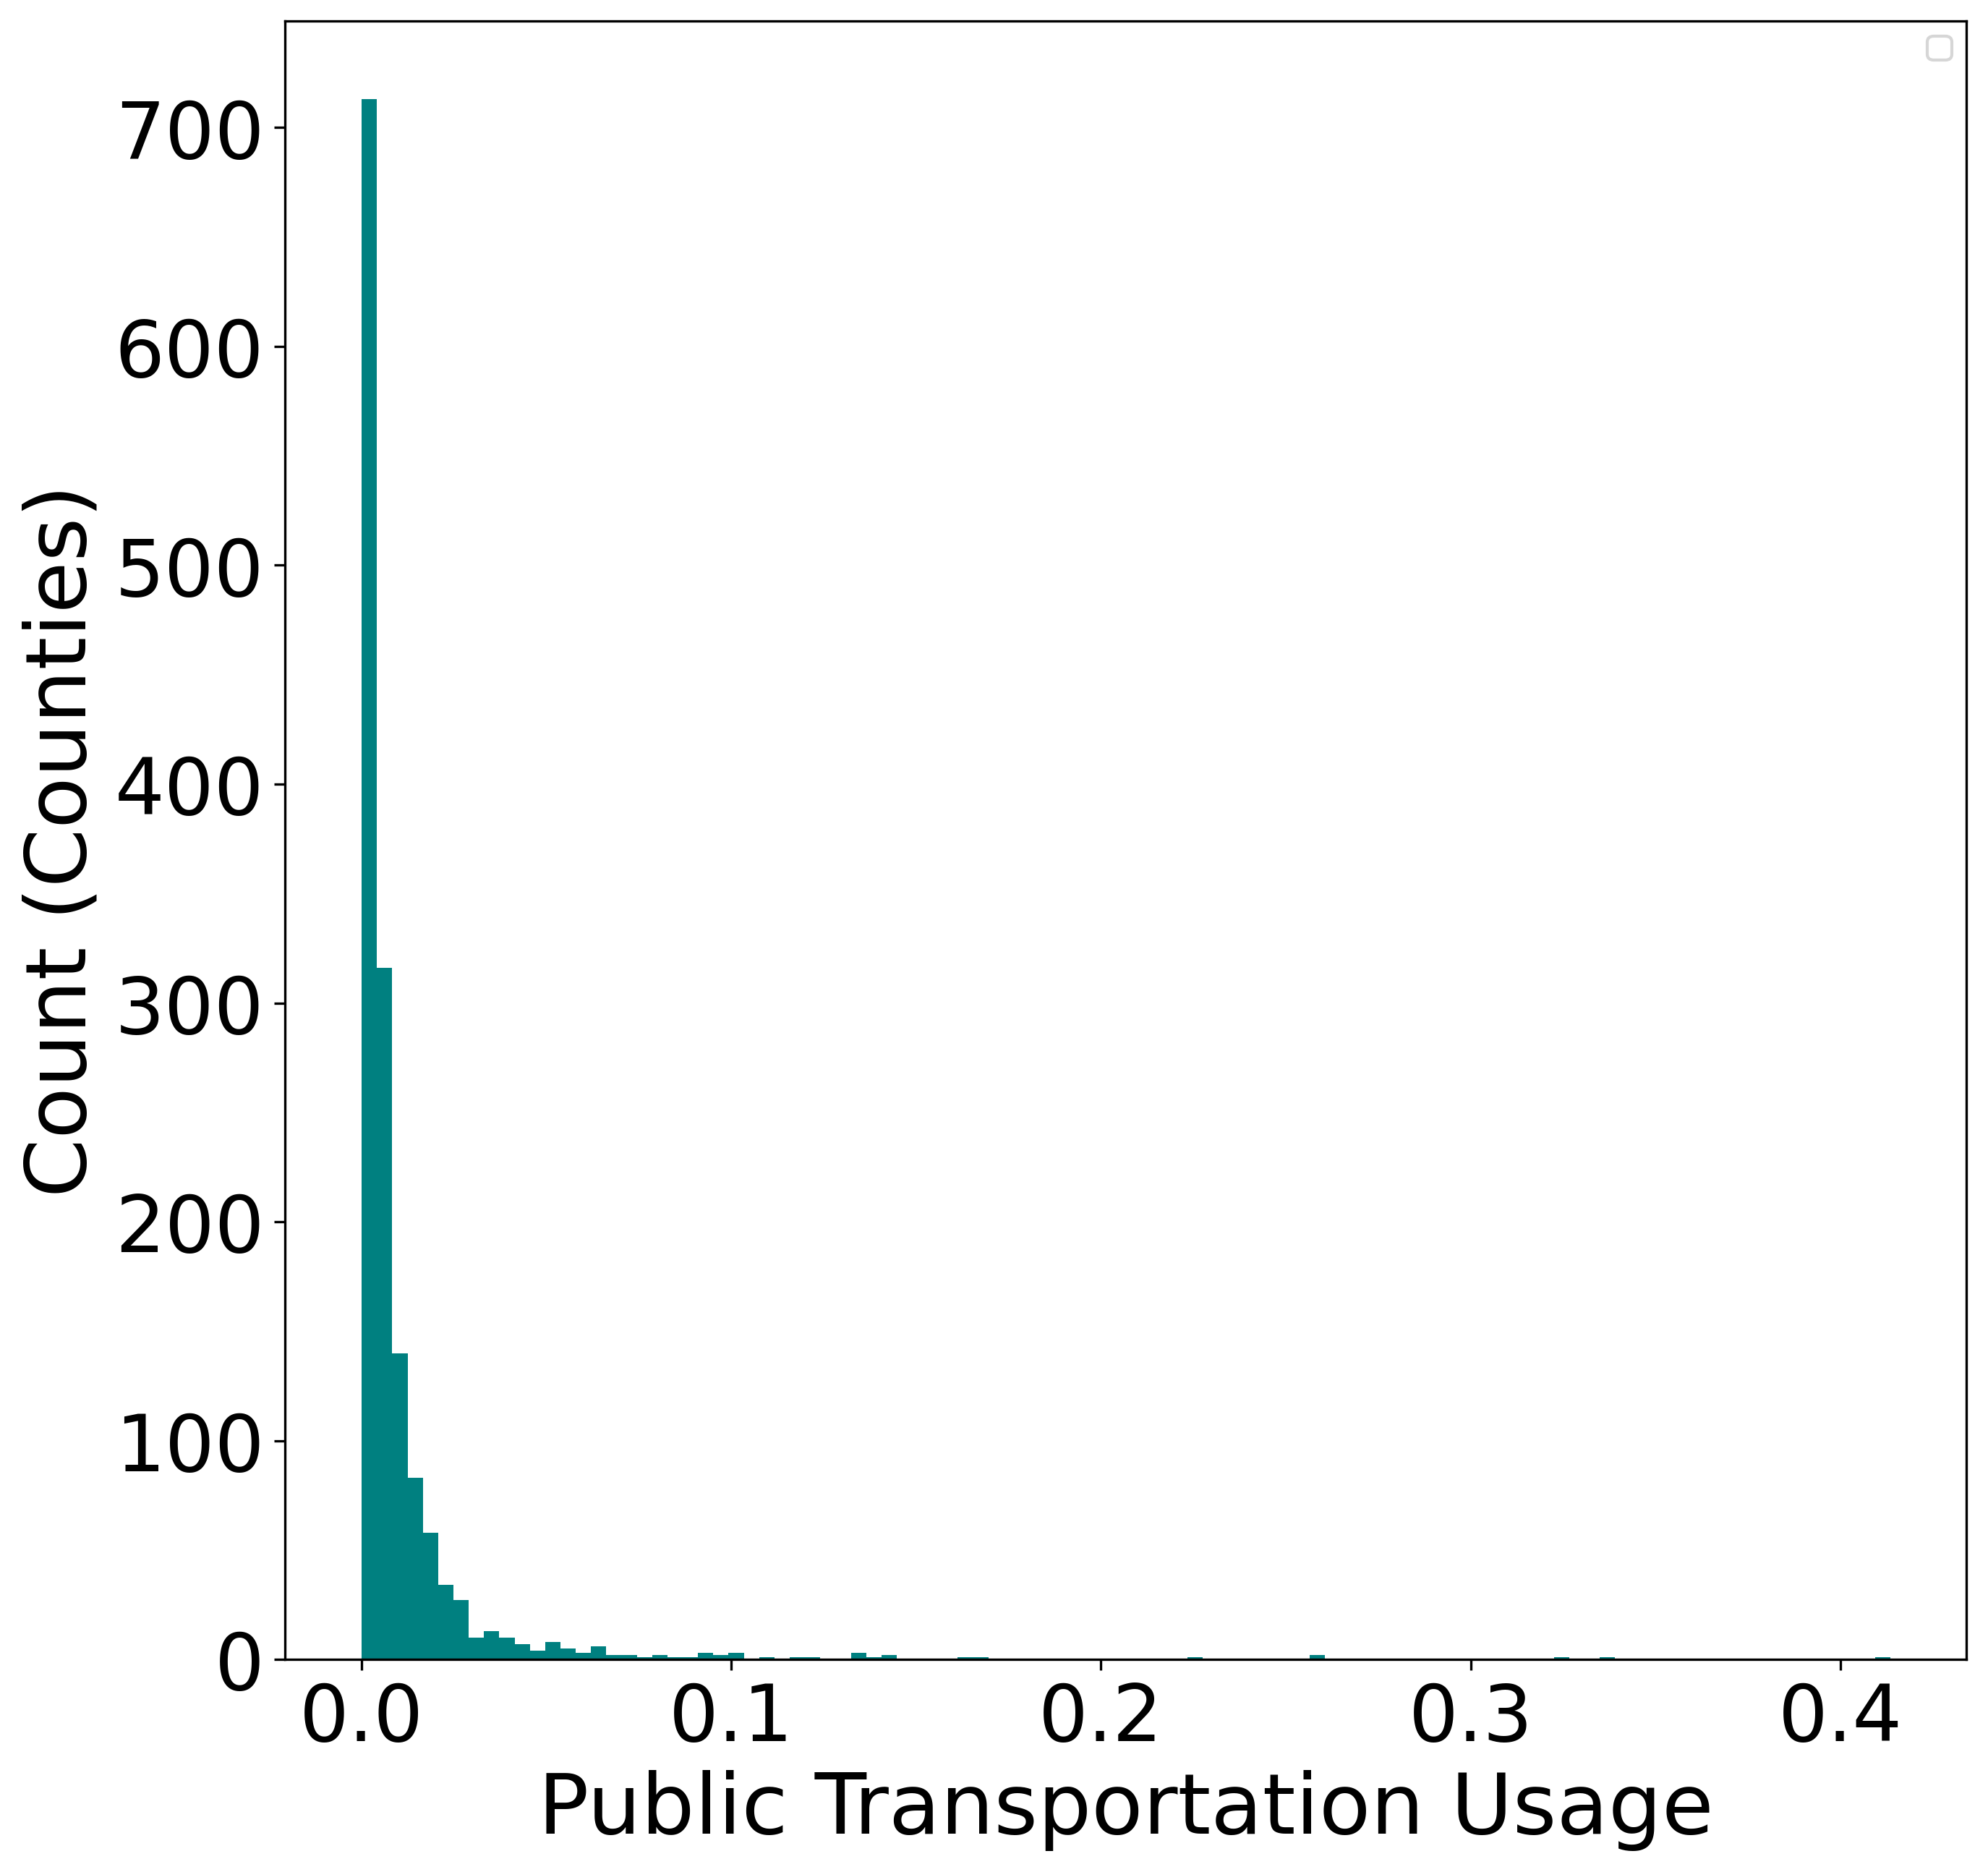

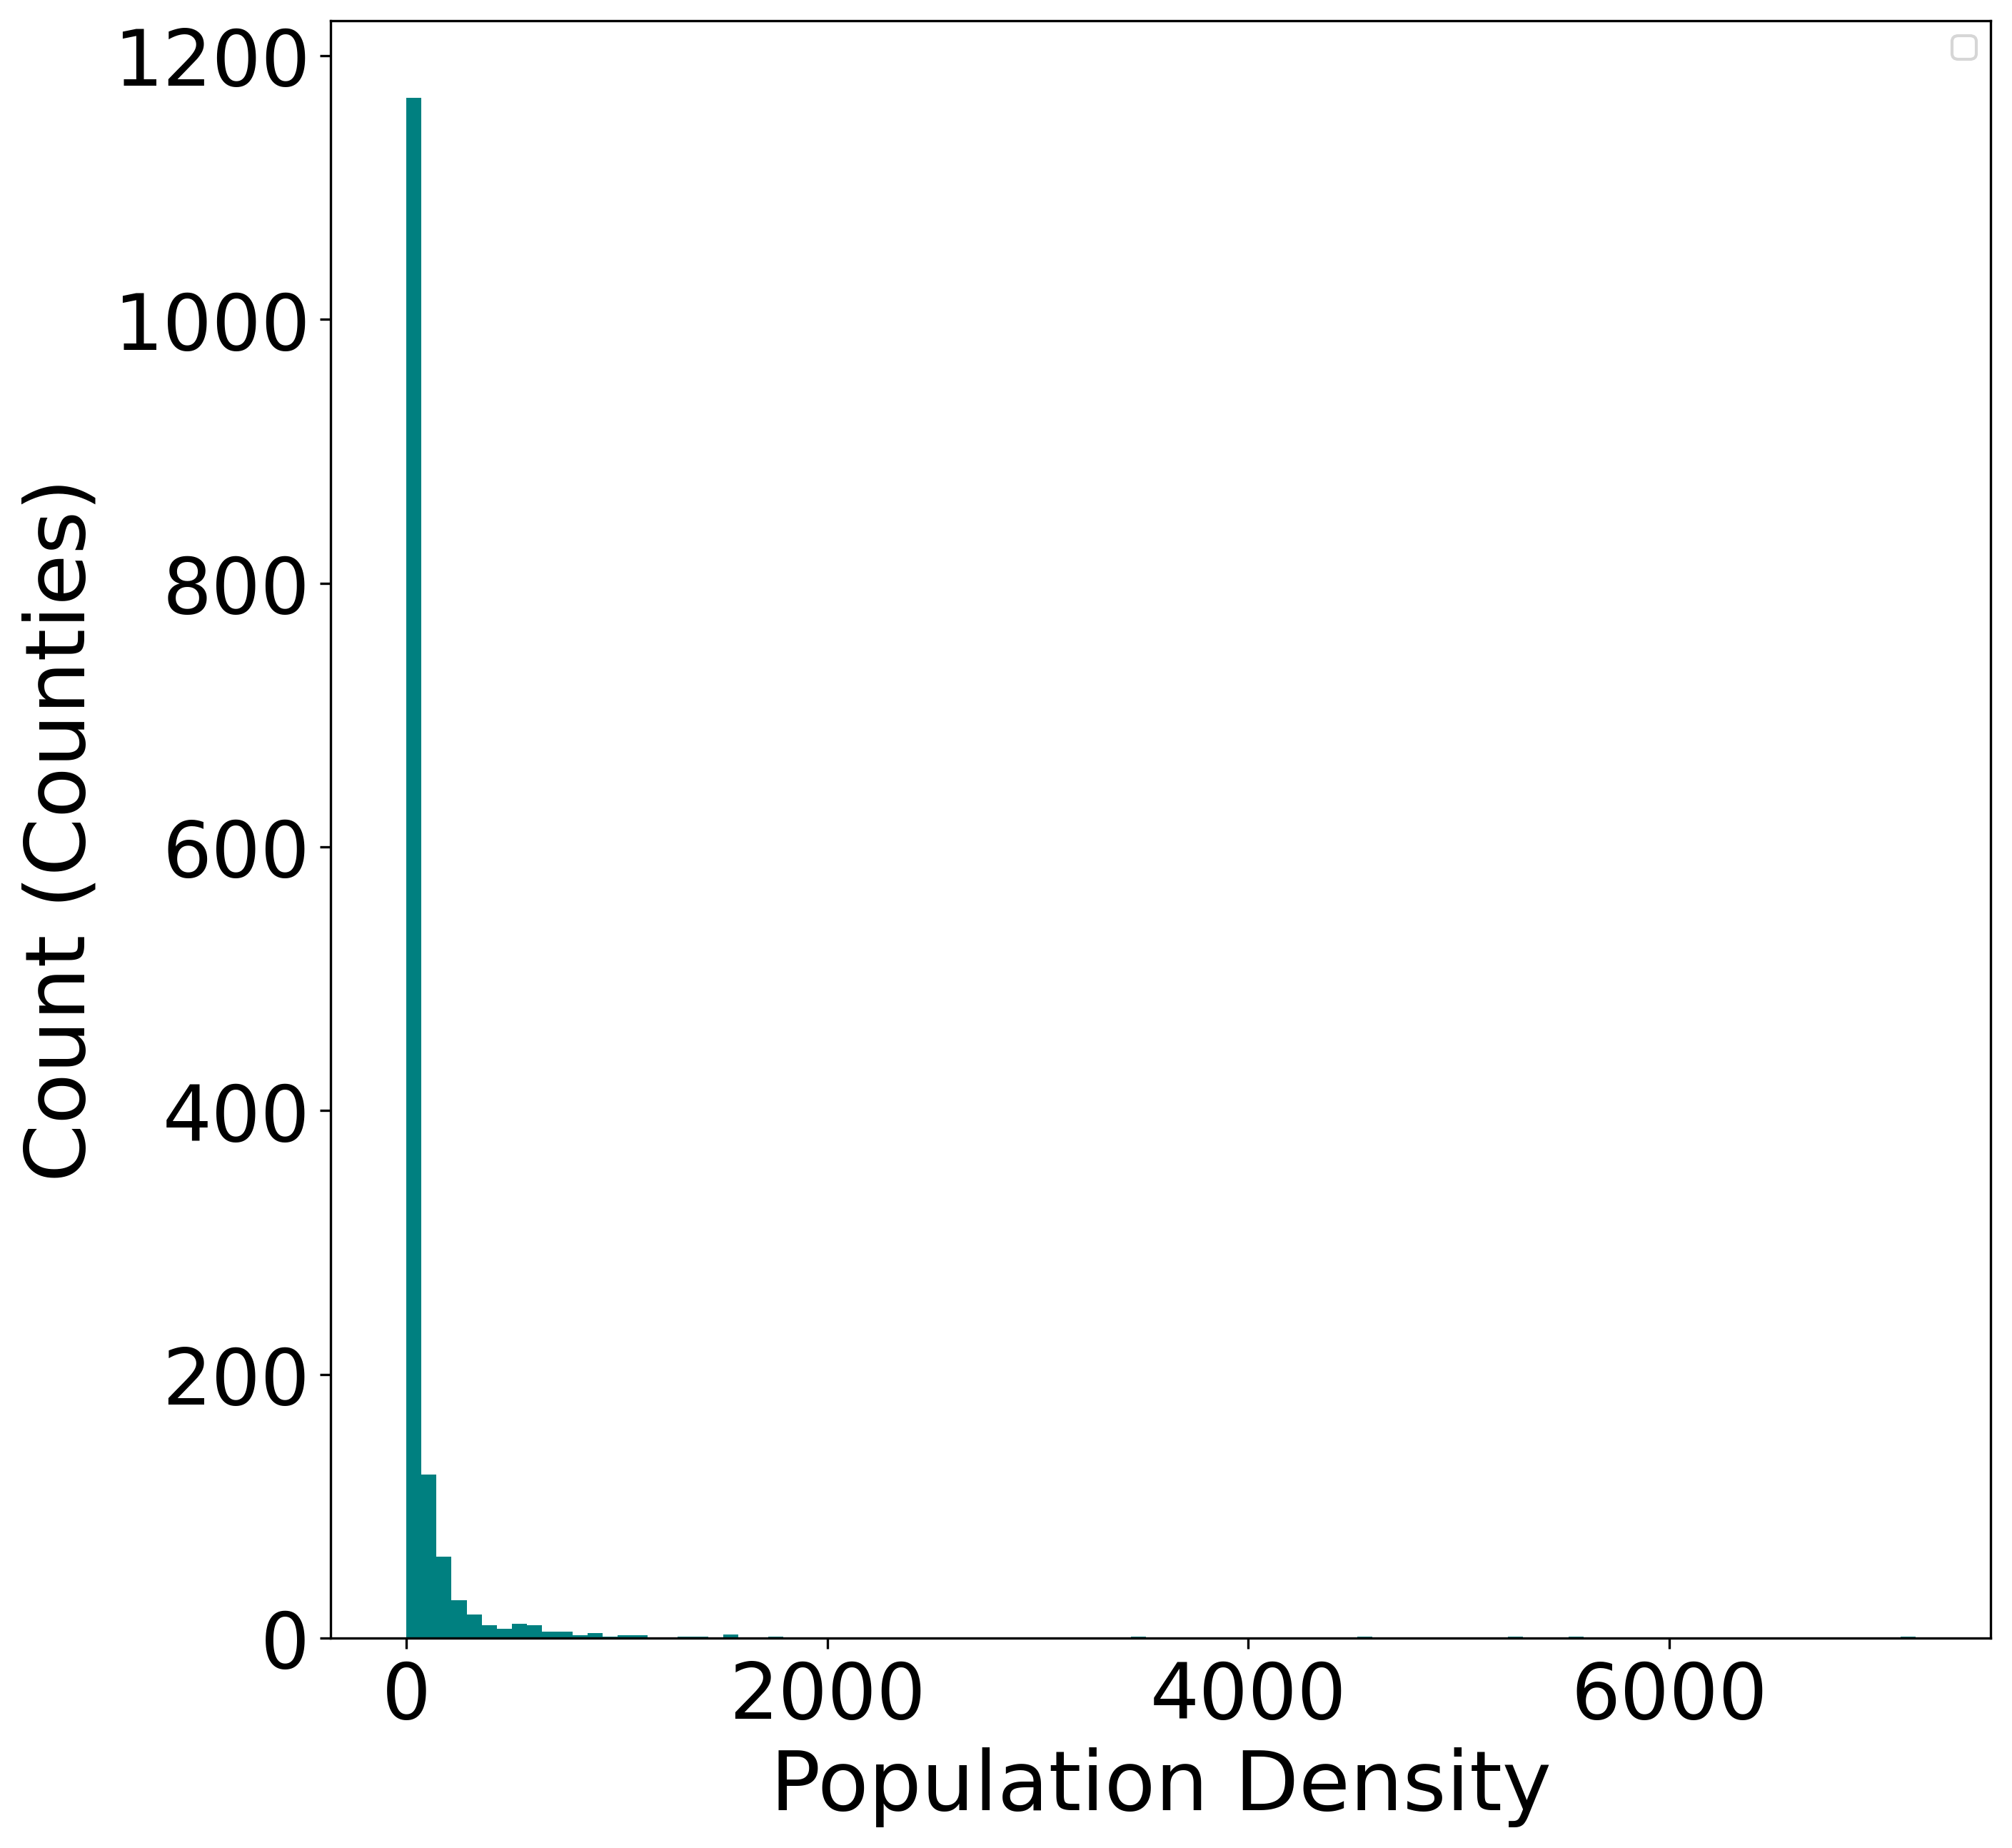

In [2]:
trans = data['PublicTransportationUsage'].tolist()
density = data['Density'].tolist()
figure(figsize = (10, 10), dpi = 300)
plt.hist(trans, bins = 100, color = 'teal')
plt.legend('')
plt.xlabel('Public Transportation Usage', fontsize=28)
plt.ylabel('Count (Counties)', fontsize=28)
plt.tick_params(labelsize=26)

figure(figsize = (10, 10), dpi = 300)
plt.hist(density, bins = 100, color = 'teal')
plt.legend('')
plt.xlabel('Population Density', fontsize=28)
plt.ylabel('Count (Counties)', fontsize=28)
plt.tick_params(labelsize=26)

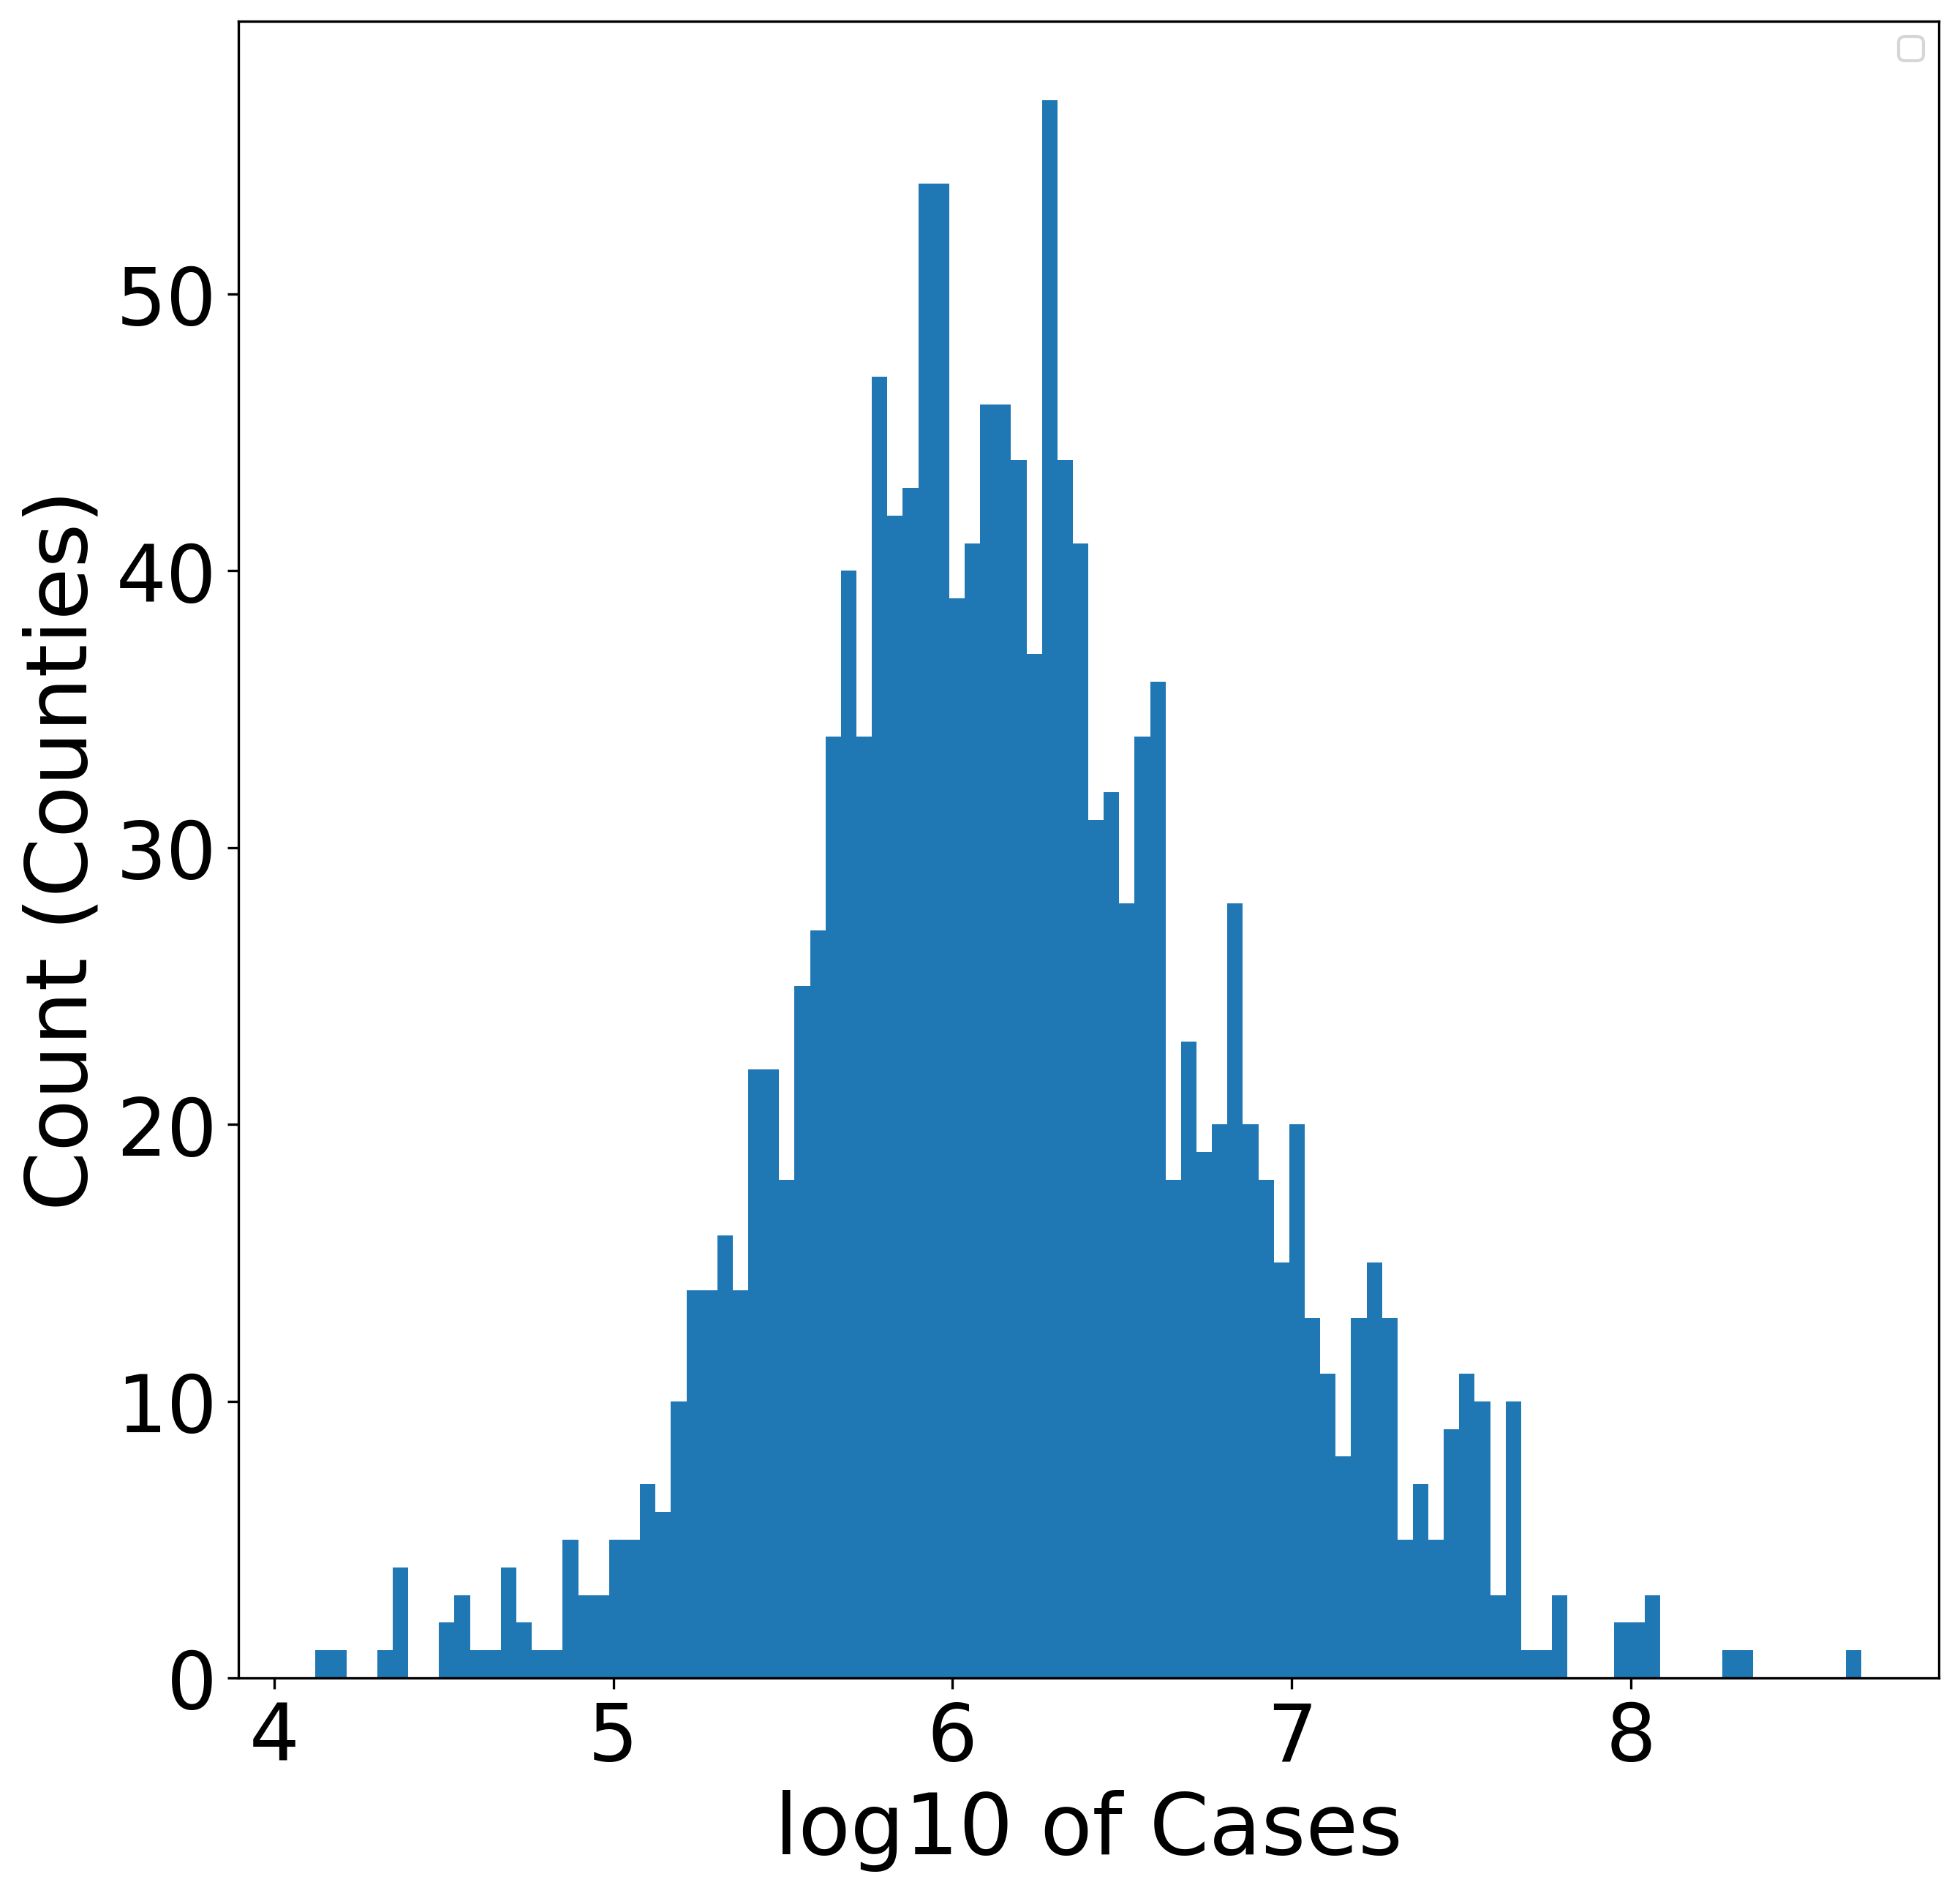

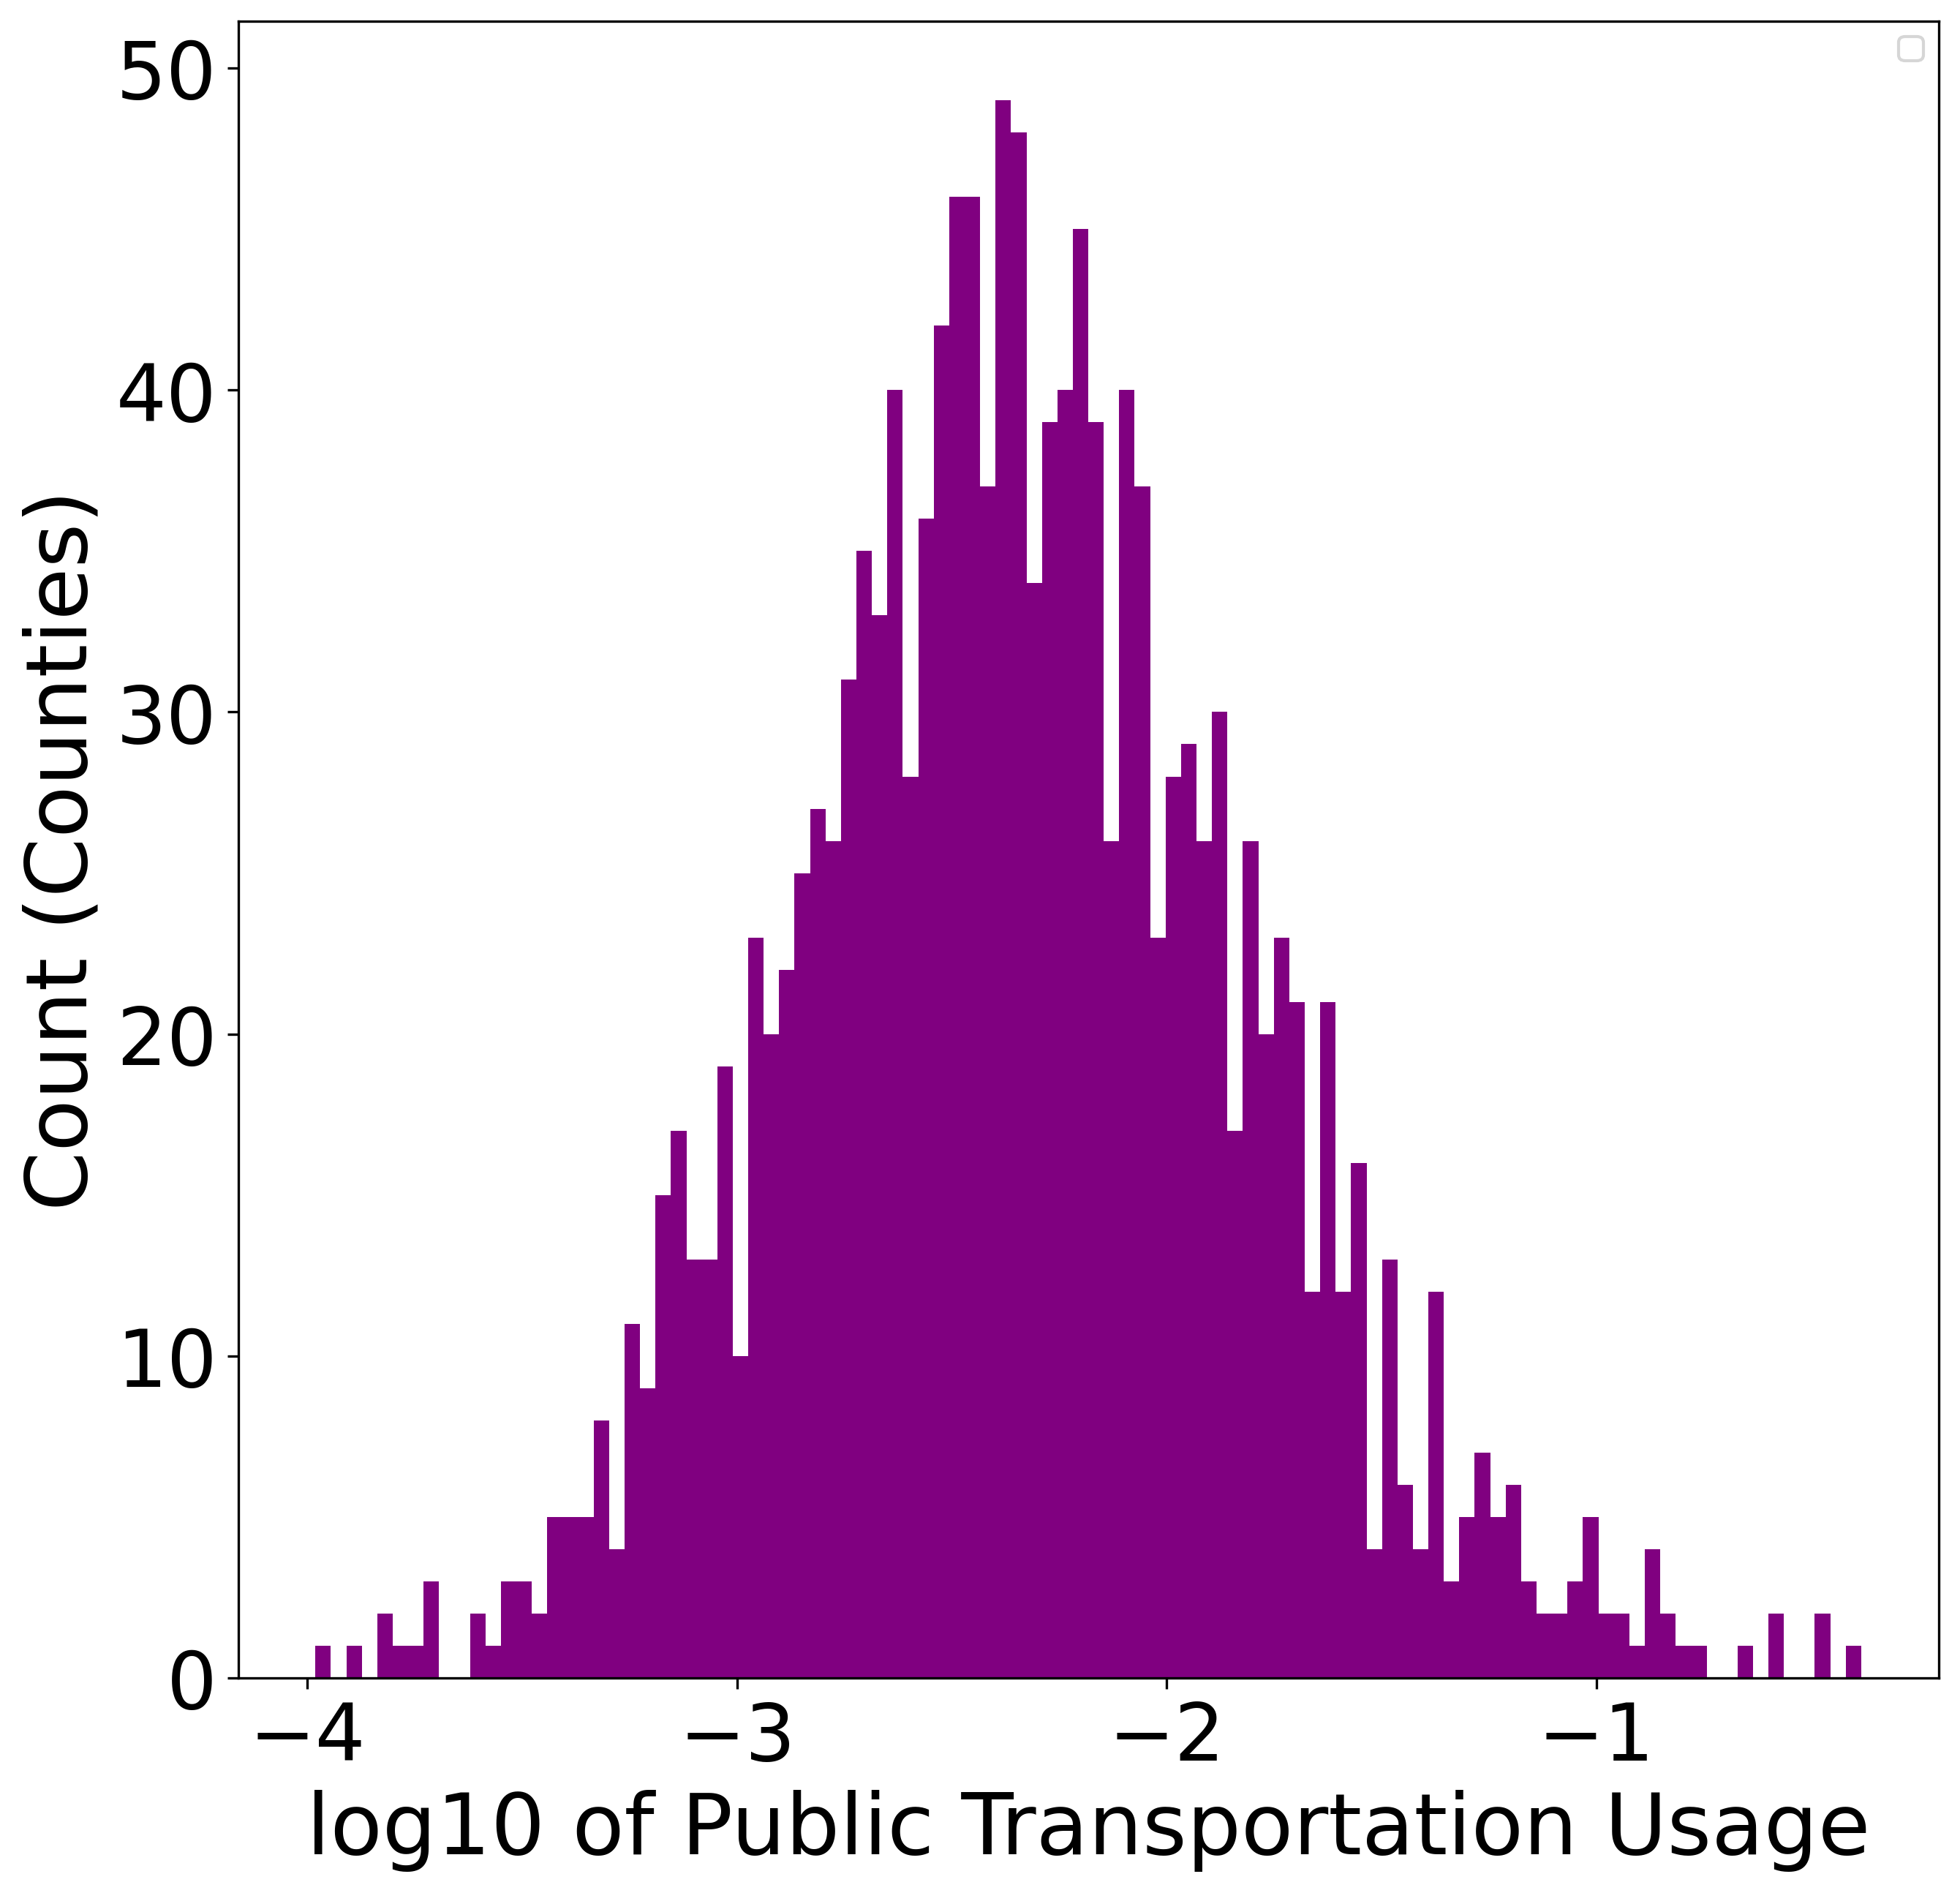

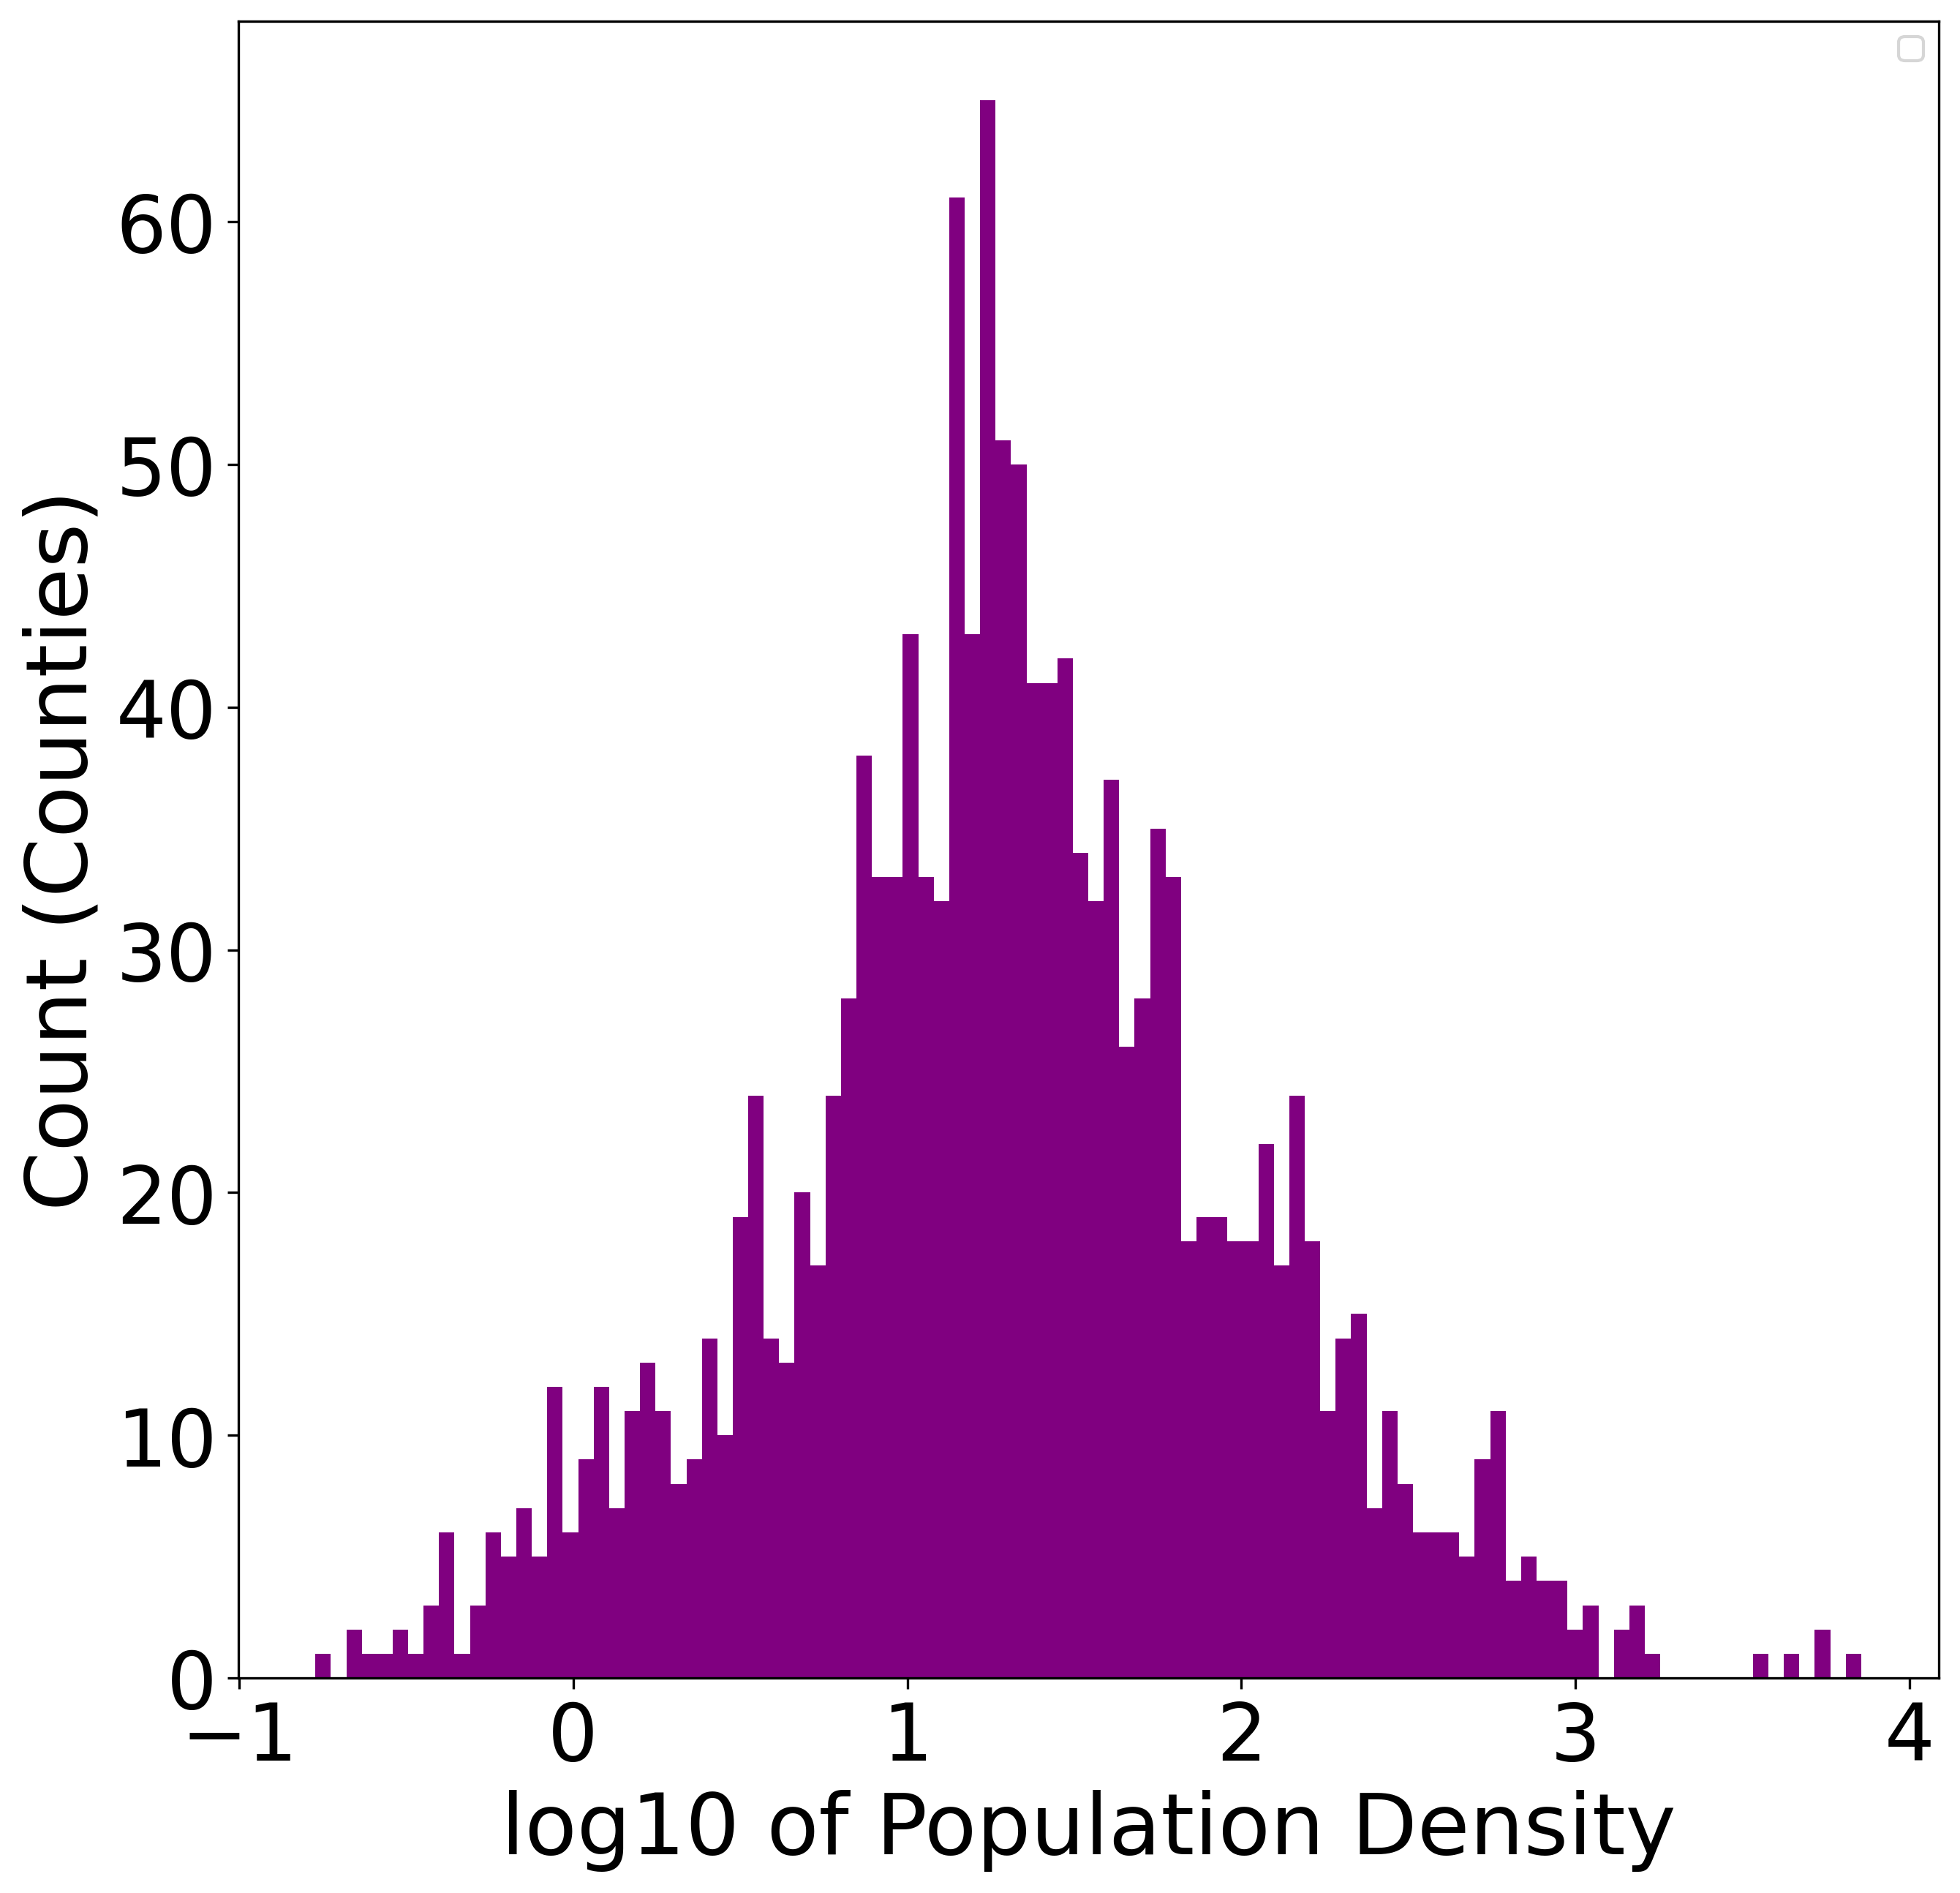

In [3]:
loginf = data['loginf'].tolist()
figure(figsize = (10, 10), dpi = 300)
plt.hist(loginf, bins = 100)
plt.legend('')
plt.xlabel('log10 of Cases', fontsize=28)
plt.ylabel('Count (Counties)', fontsize=28)
plt.tick_params(labelsize=26)

logtrans = data['logtrans'].tolist()
figure(figsize = (10, 10), dpi = 300)
plt.hist(logtrans, bins = 100, color = 'purple')
plt.legend('')
plt.xlabel('log10 of Public Transportation Usage', fontsize=28)
plt.ylabel('Count (Counties)', fontsize=28)
plt.tick_params(labelsize=26)

logdensity = data['logdensity'].tolist()
figure(figsize = (10, 10), dpi = 300)
plt.hist(logdensity, bins = 100, color = 'purple')
plt.legend('')
plt.xlabel('log10 of Population Density', fontsize=28)
plt.ylabel('Count (Counties)', fontsize=28)
plt.tick_params(labelsize=26)

avg cases per capita: 41.53579426564035 stdev cases per capita 11.605462846085826 avg log10(ptu): -2.326378458671766 stdev log10trans 0.5359196064360122 avg log10pd 1.3160657442222483 stdev log10pd 0.7104642813018887
CV cases per capita 0.2794087136474049 CV trans usage -0.230366475600016 CV logpd 0.5398395060588328


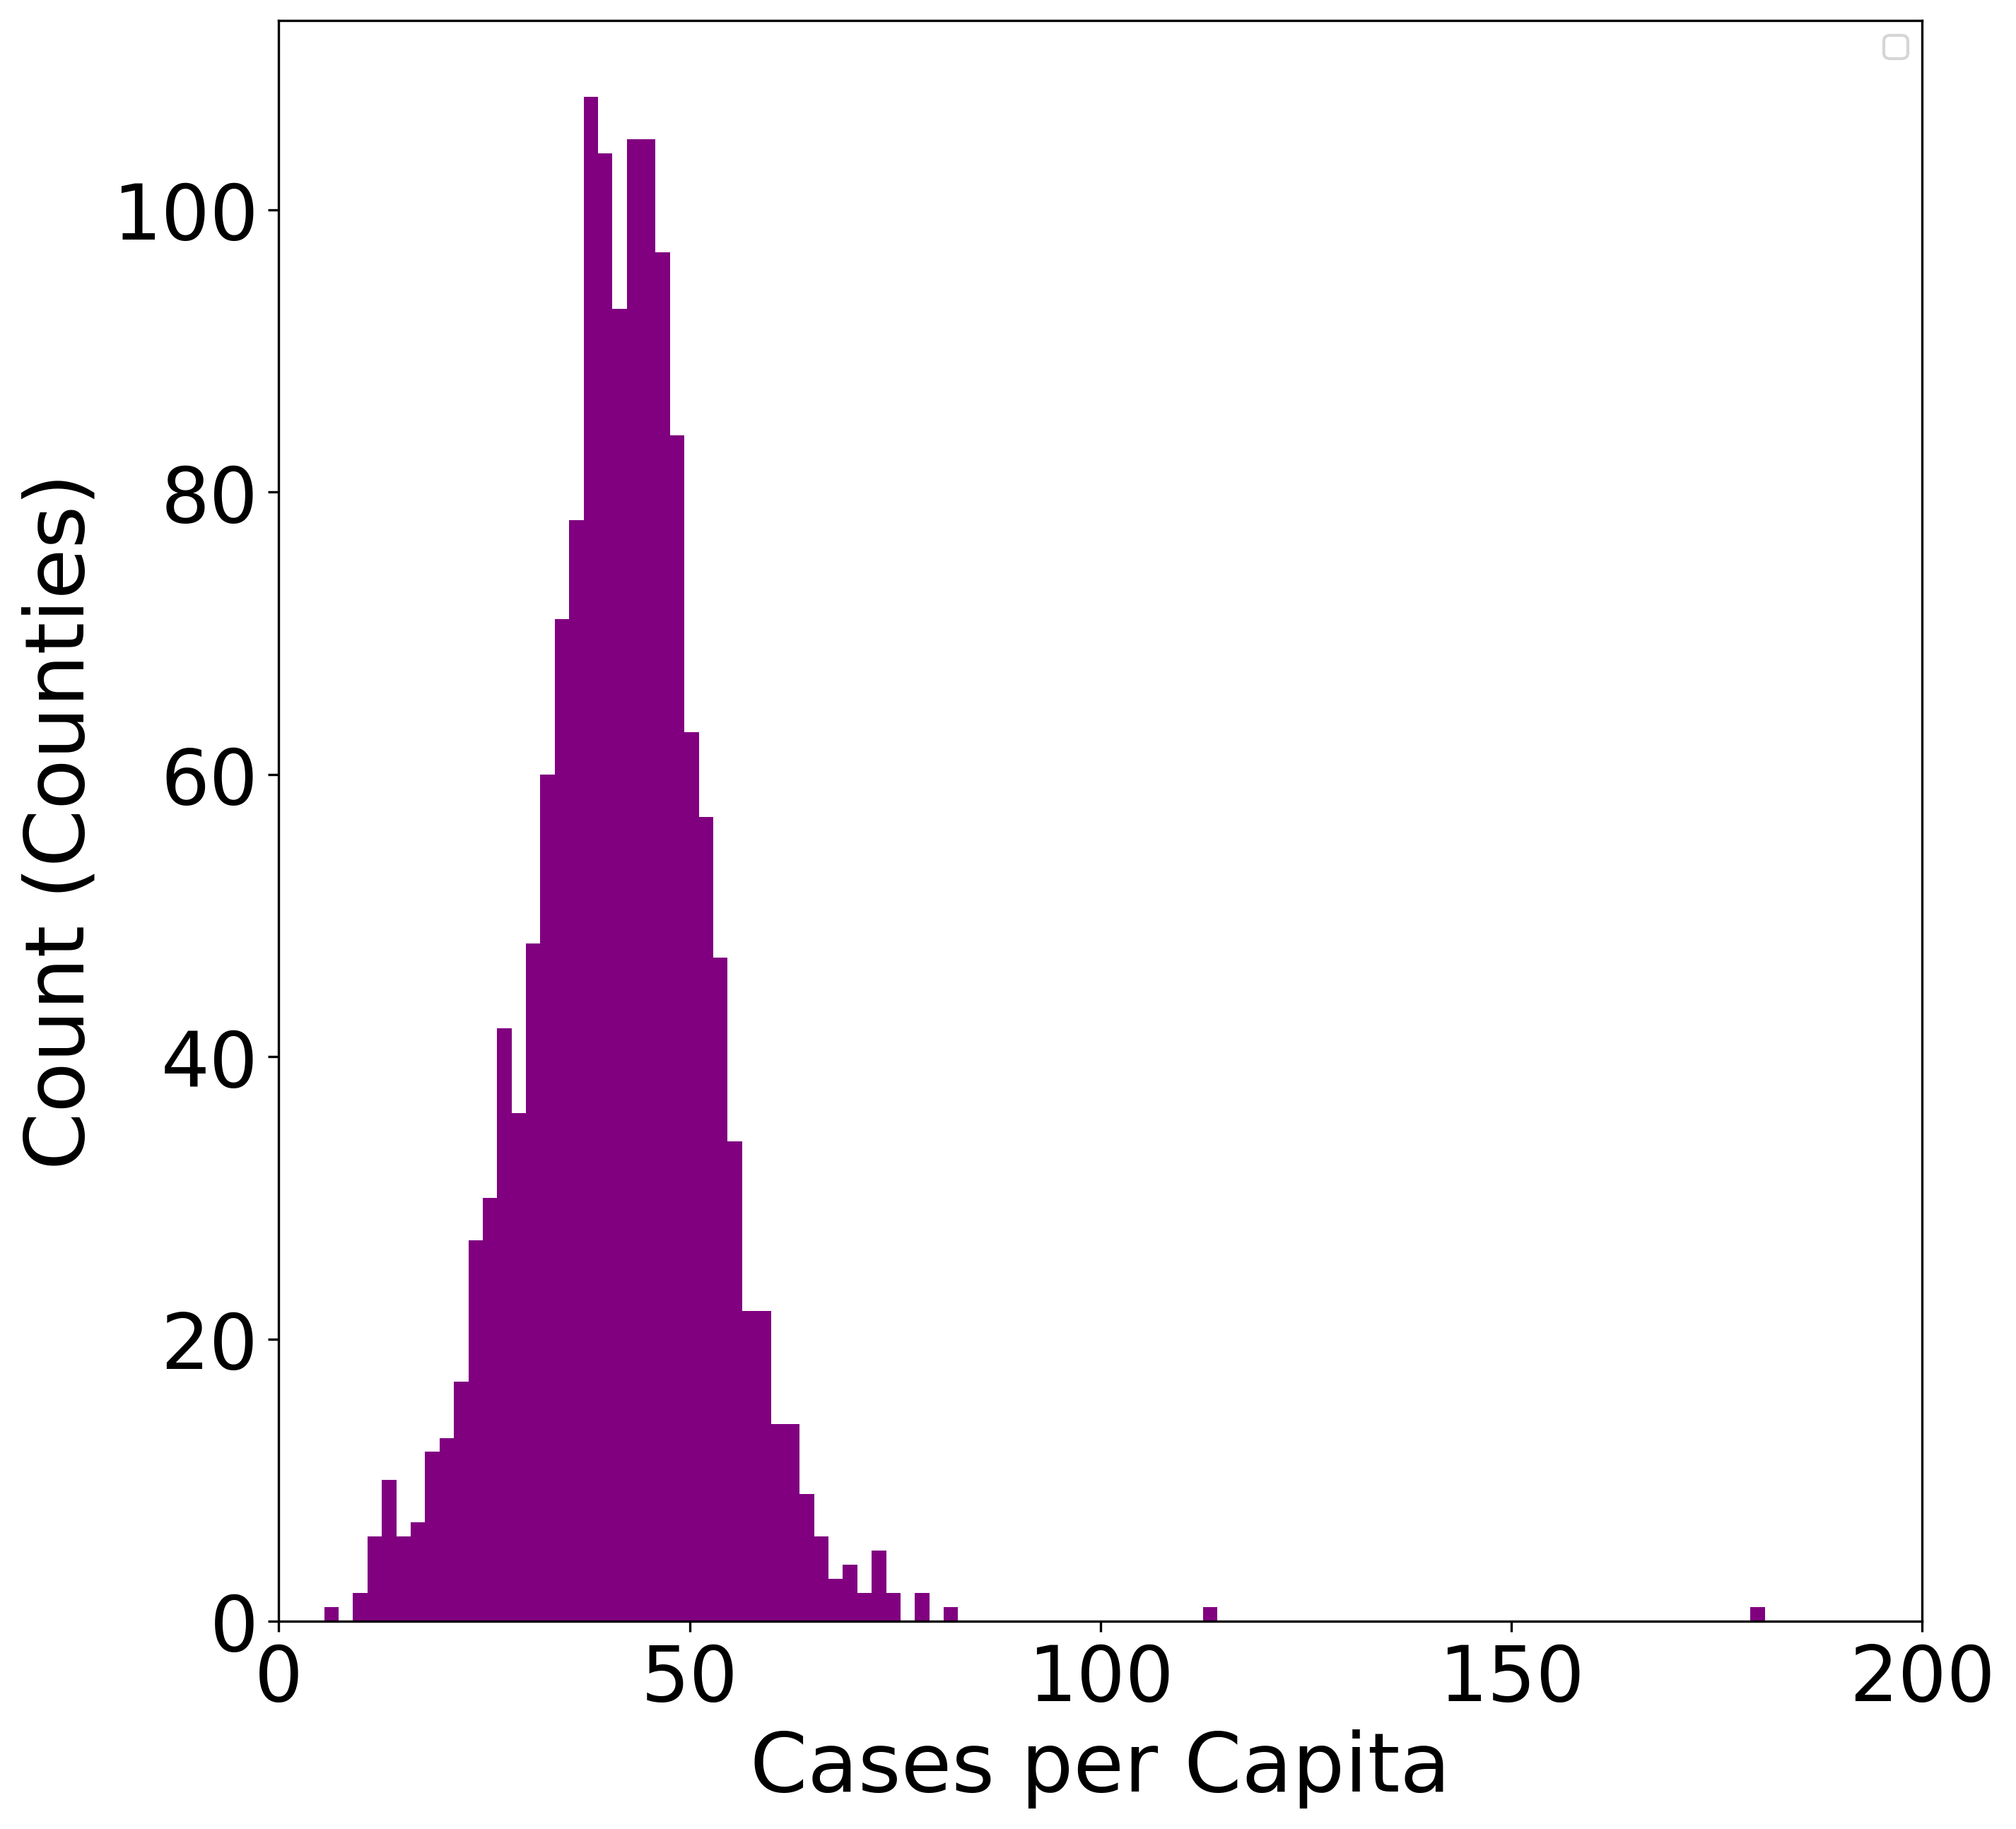

In [4]:
infperpop = data['infperpop'].tolist()
figure(figsize = (10, 10), dpi = 300)
plt.hist(infperpop, bins = 100, color = 'purple')
plt.legend('')
plt.xlabel('Cases per Capita', fontsize=28)
plt.ylabel('Count (Counties)', fontsize=28)
plt.tick_params(labelsize=26)
plt.xlim([0, 200])
print('avg cases per capita:',np.average(infperpop), 'stdev cases per capita', np.std(infperpop), 'avg log10(ptu):', np.average(logtrans), 'stdev log10trans', np.std(logtrans), 'avg log10pd', np.average(logdensity), 'stdev log10pd', np.std(logdensity))
print('CV cases per capita', (np.std(infperpop)/np.average(infperpop)), 'CV trans usage', (np.std(logtrans)/np.average(logtrans)), 'CV logpd', (np.std(logdensity)/np.average(logdensity)))

Density by county, total covid infections by county in 2021, and public transportation usage by county are all only visualizeable from a log scale perspective. This is because all of these data have similar reasons for data being clustered around the lower entries. For example, for density, it's because counties are often a measure of space, so the bulk of people will be within a small number of counties. This is the same for public transportation and covid infections.

There aren't any visible relationships between these very noisy sets of data. It's very likely that these factors do not influence the total infection rate.

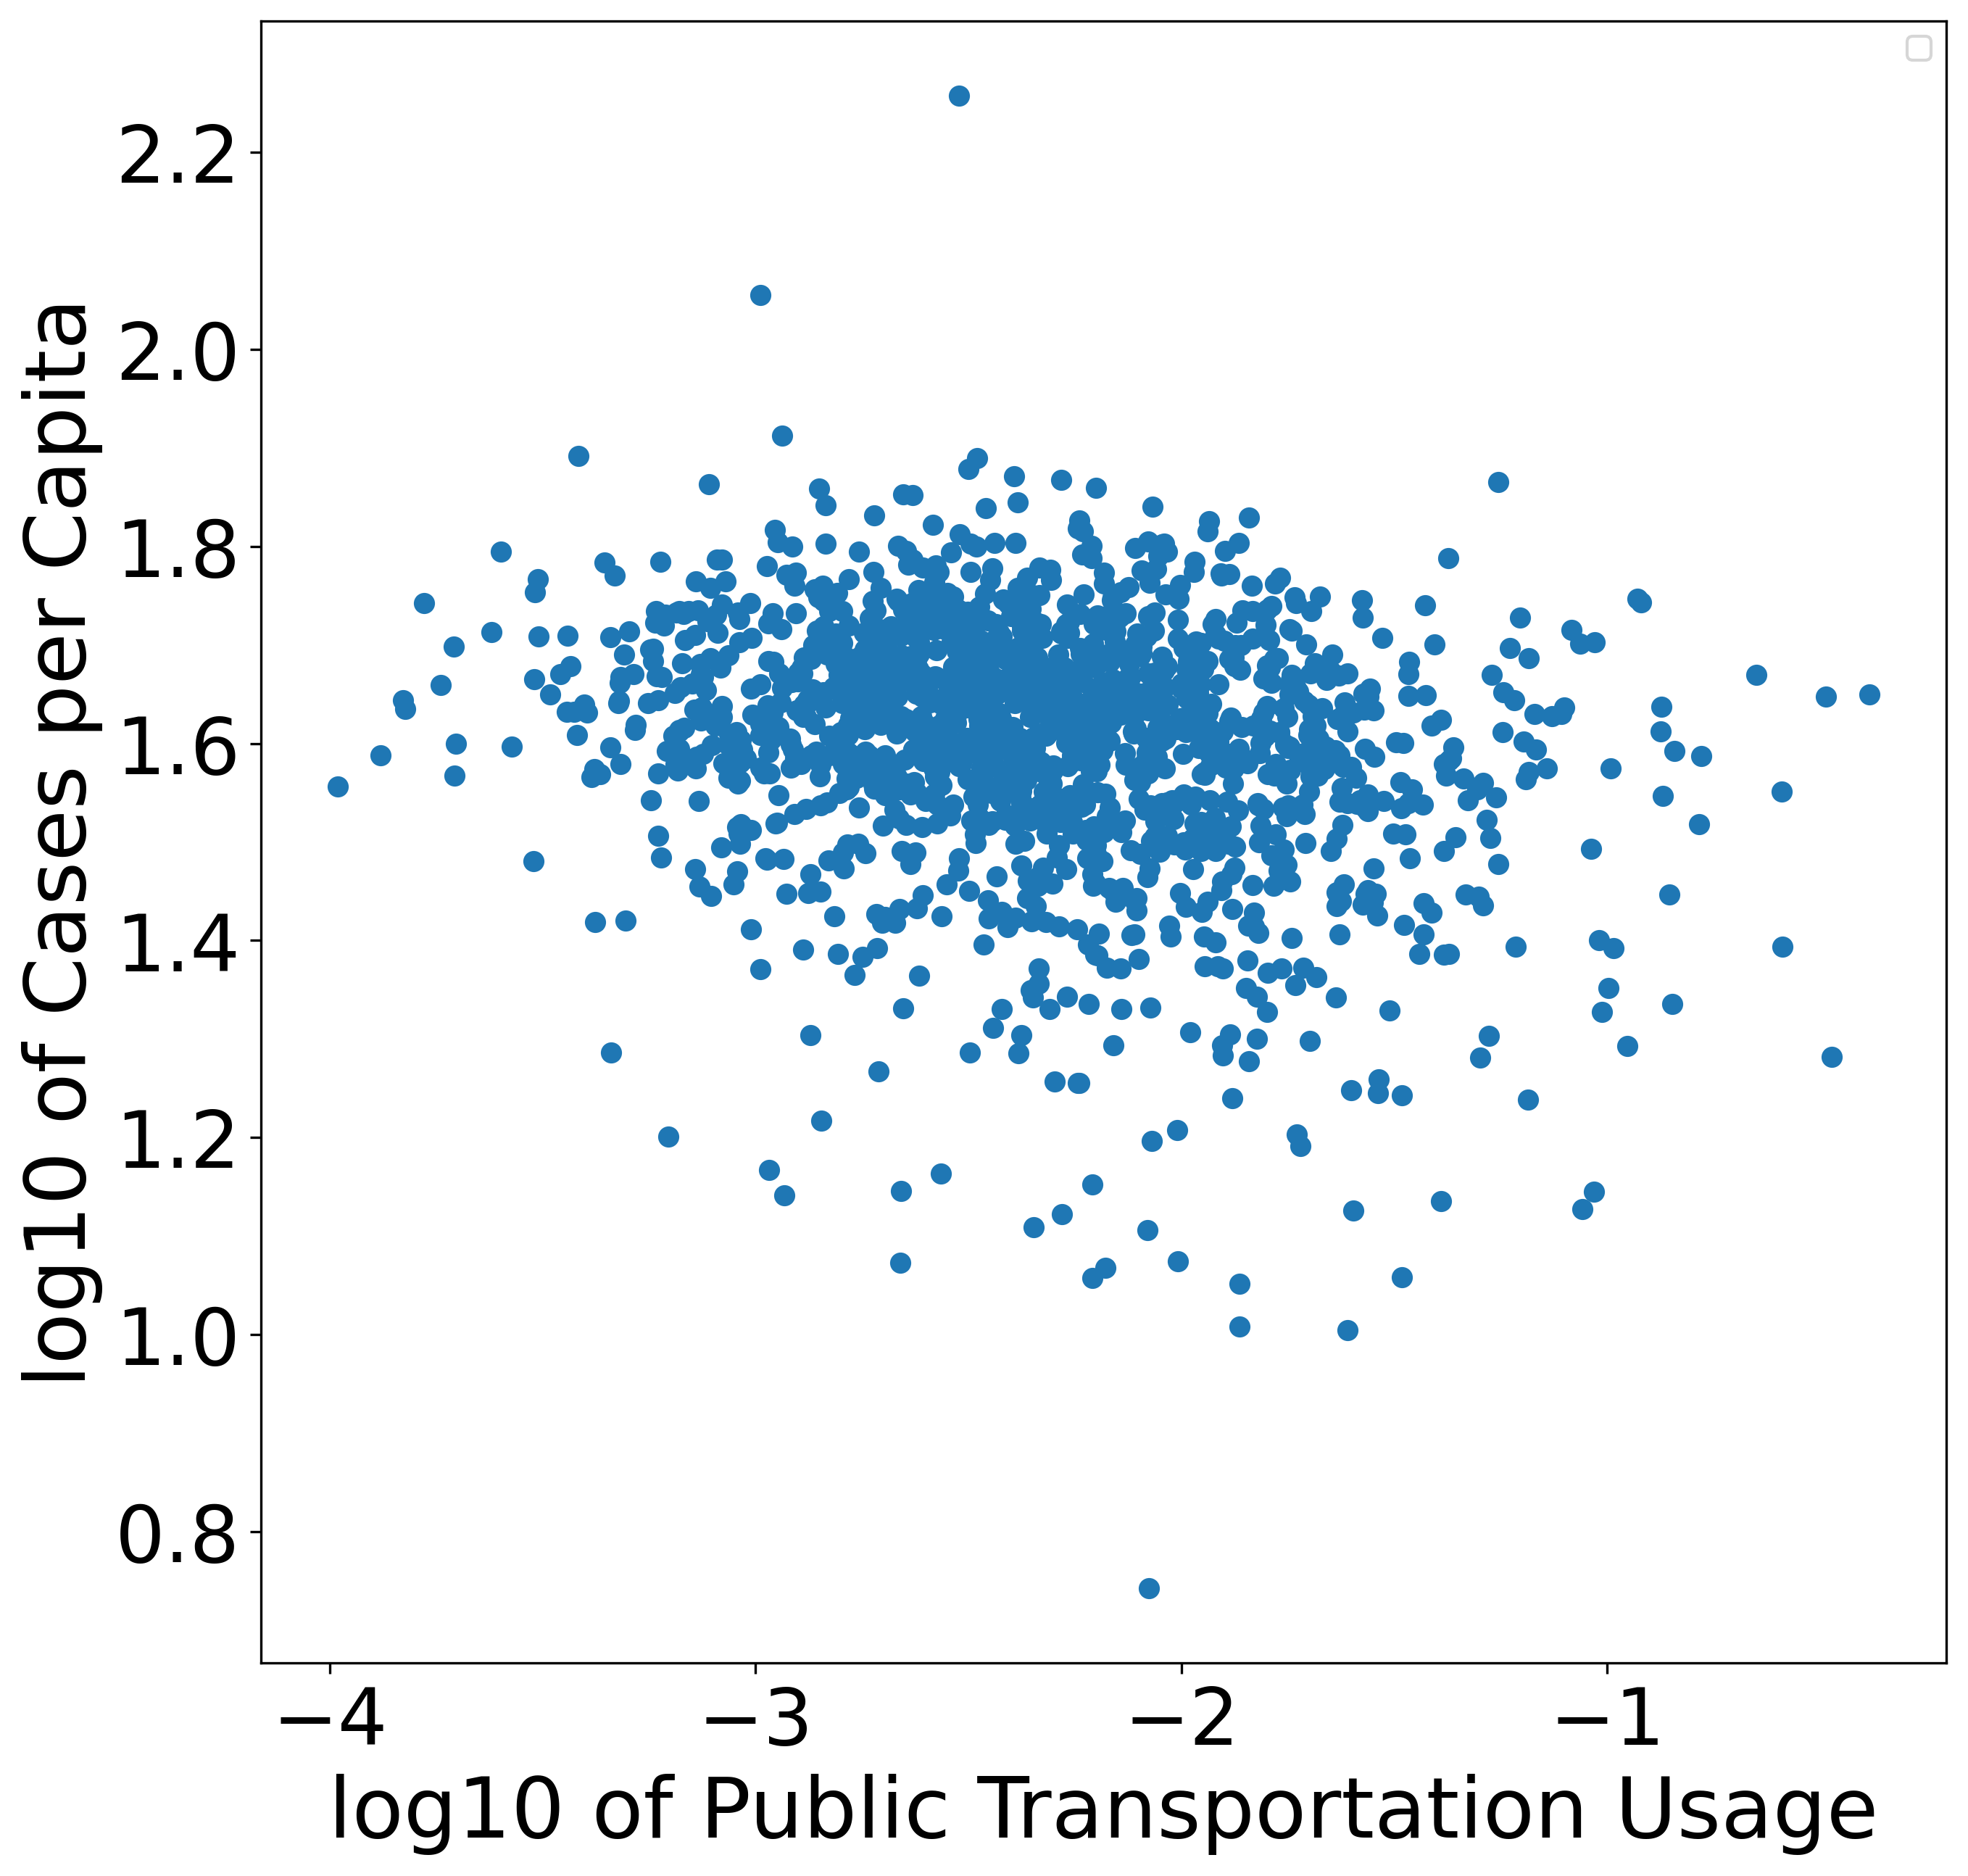

In [5]:
figure(figsize = (10, 10), dpi = 300)
ax = plt.scatter(x = data['logtrans'], y =data['loginfperpop'])
plt.legend('')
plt.tick_params(labelsize=26)
plt.xlabel('log10 of Public Transportation Usage', fontsize = 28)
plt.ylabel('log10 of Cases per Capita', fontsize = 28)
plt.show()

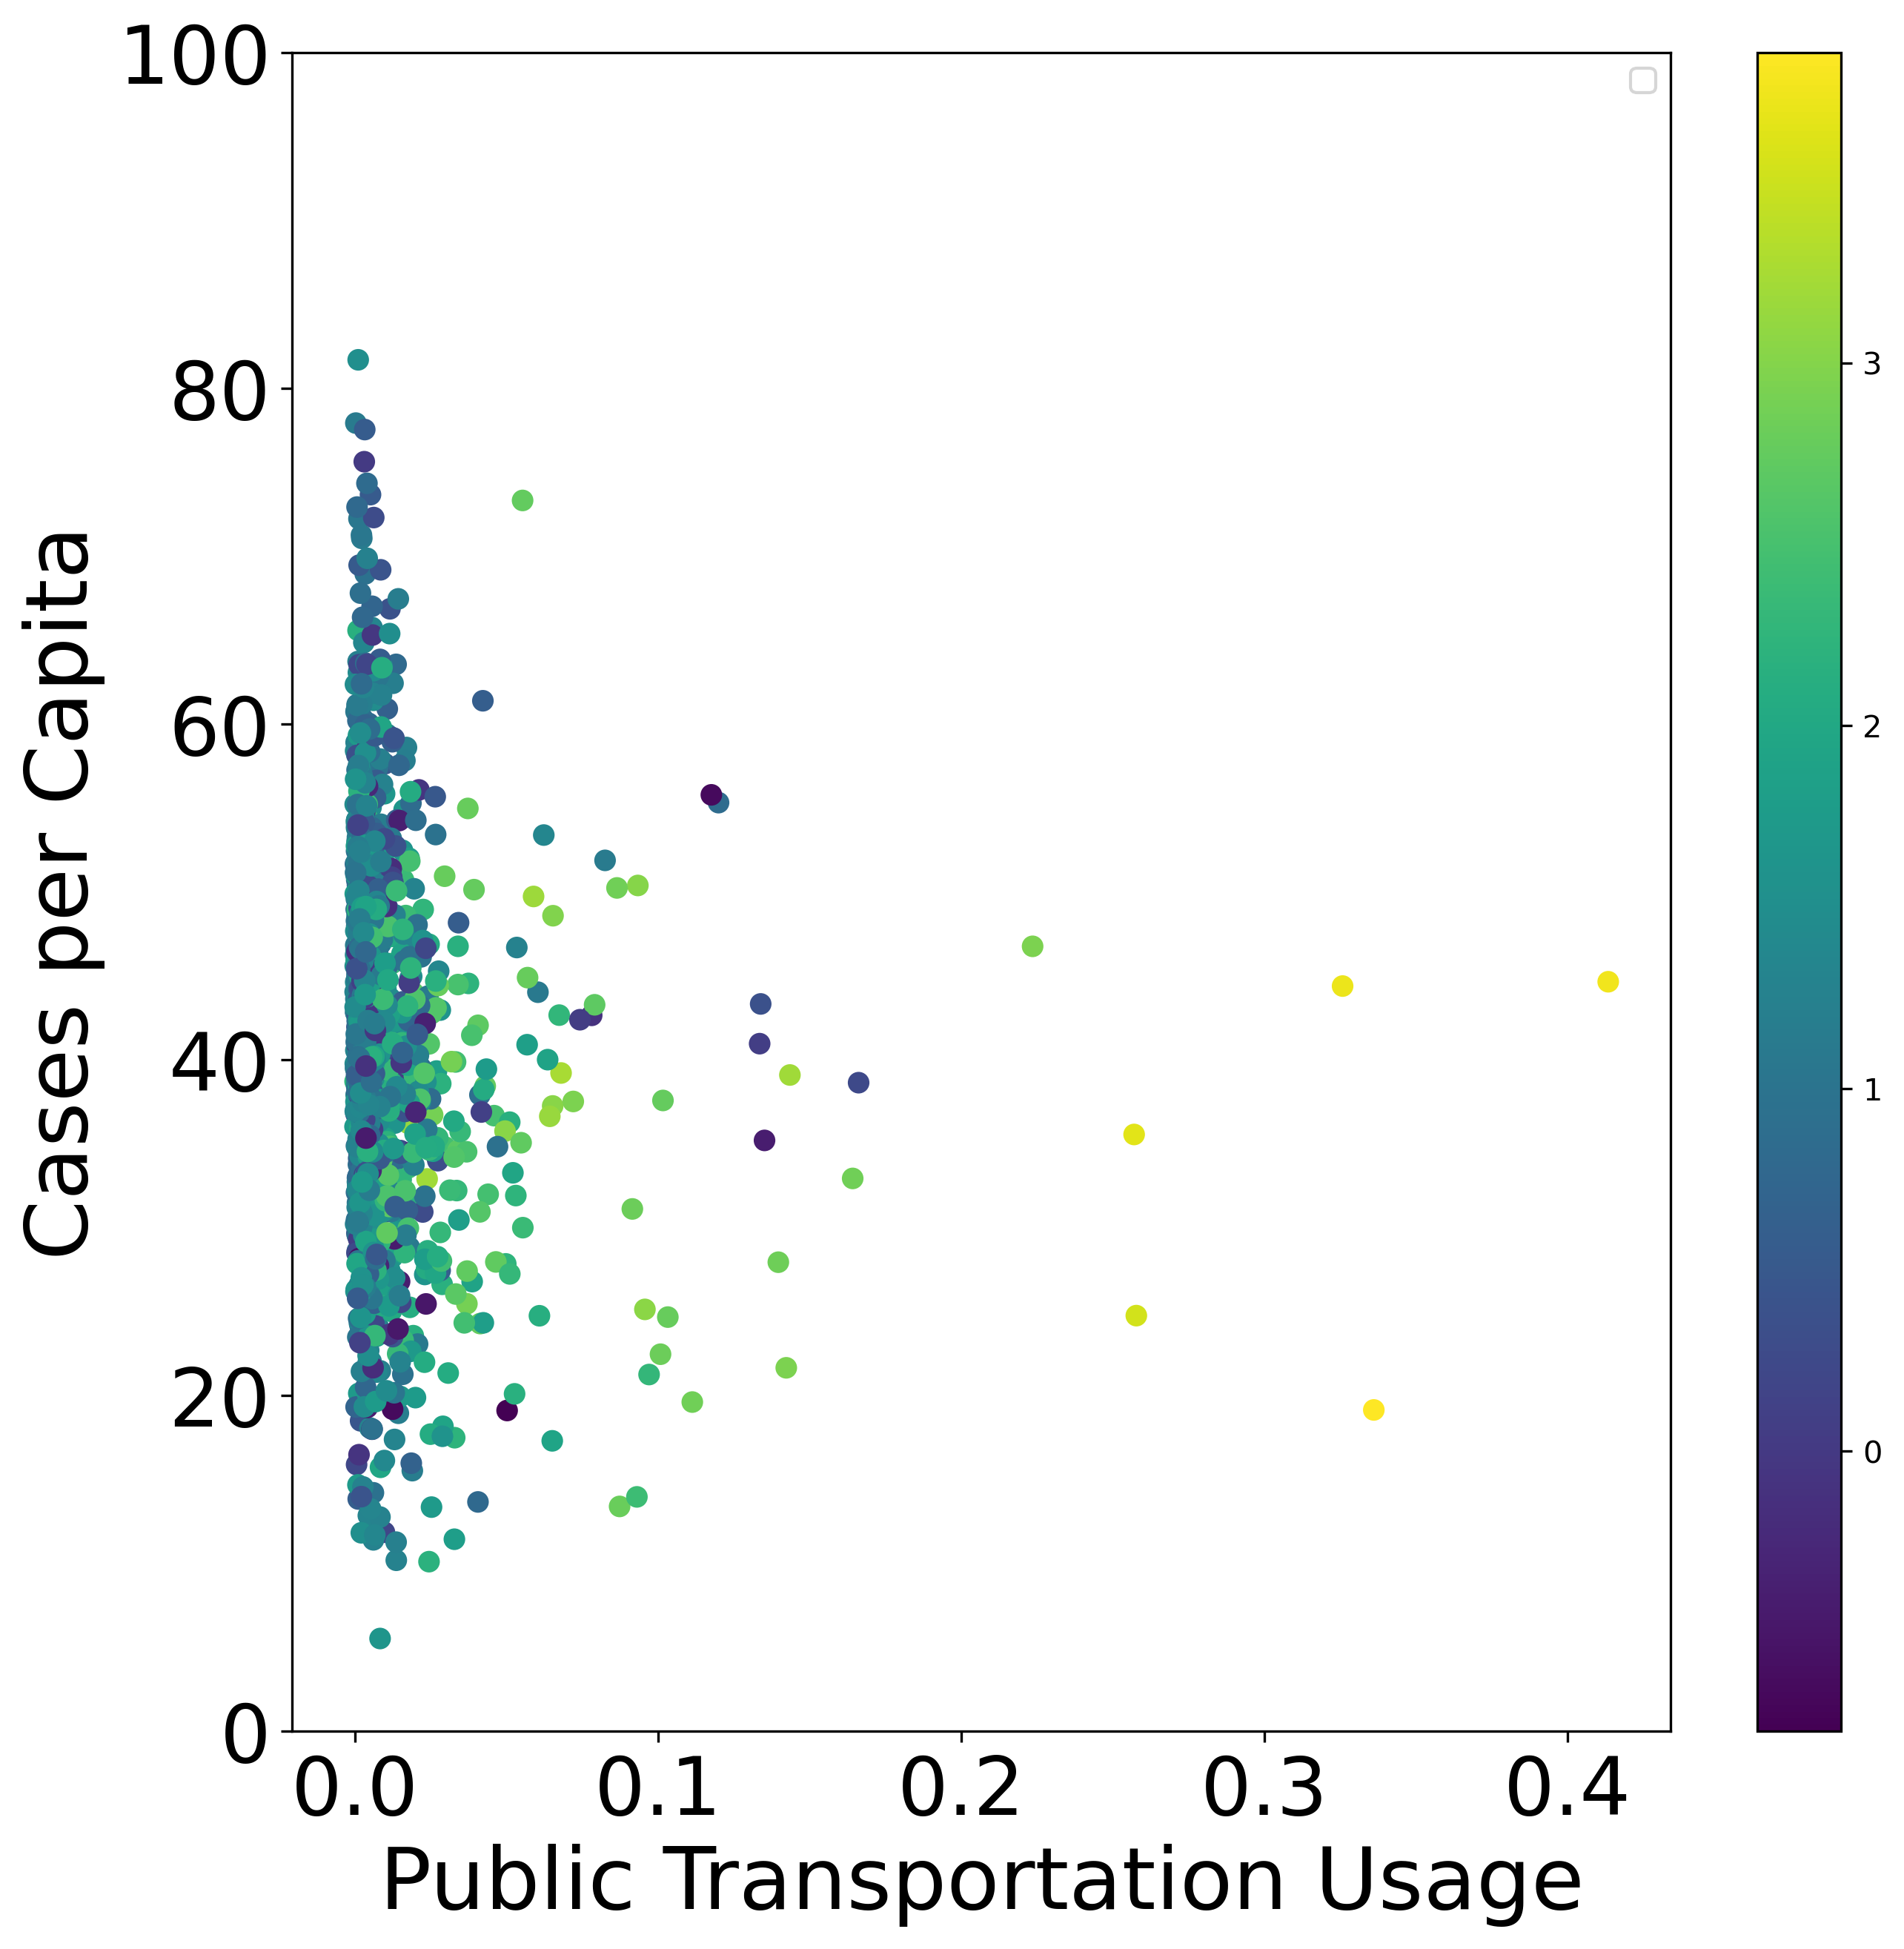

In [6]:
figure(figsize = (10, 10), dpi = 300)
ax = plt.scatter(x = data['PublicTransportationUsage'], y =data['infperpop'], c = data['logdensity'])
plt.legend('')
plt.tick_params(labelsize=26)
plt.xlabel('Public Transportation Usage', fontsize = 28)
plt.ylabel('Cases per Capita', fontsize = 28)
plt.ylim(0, 100)
plt.colorbar()
plt.show()

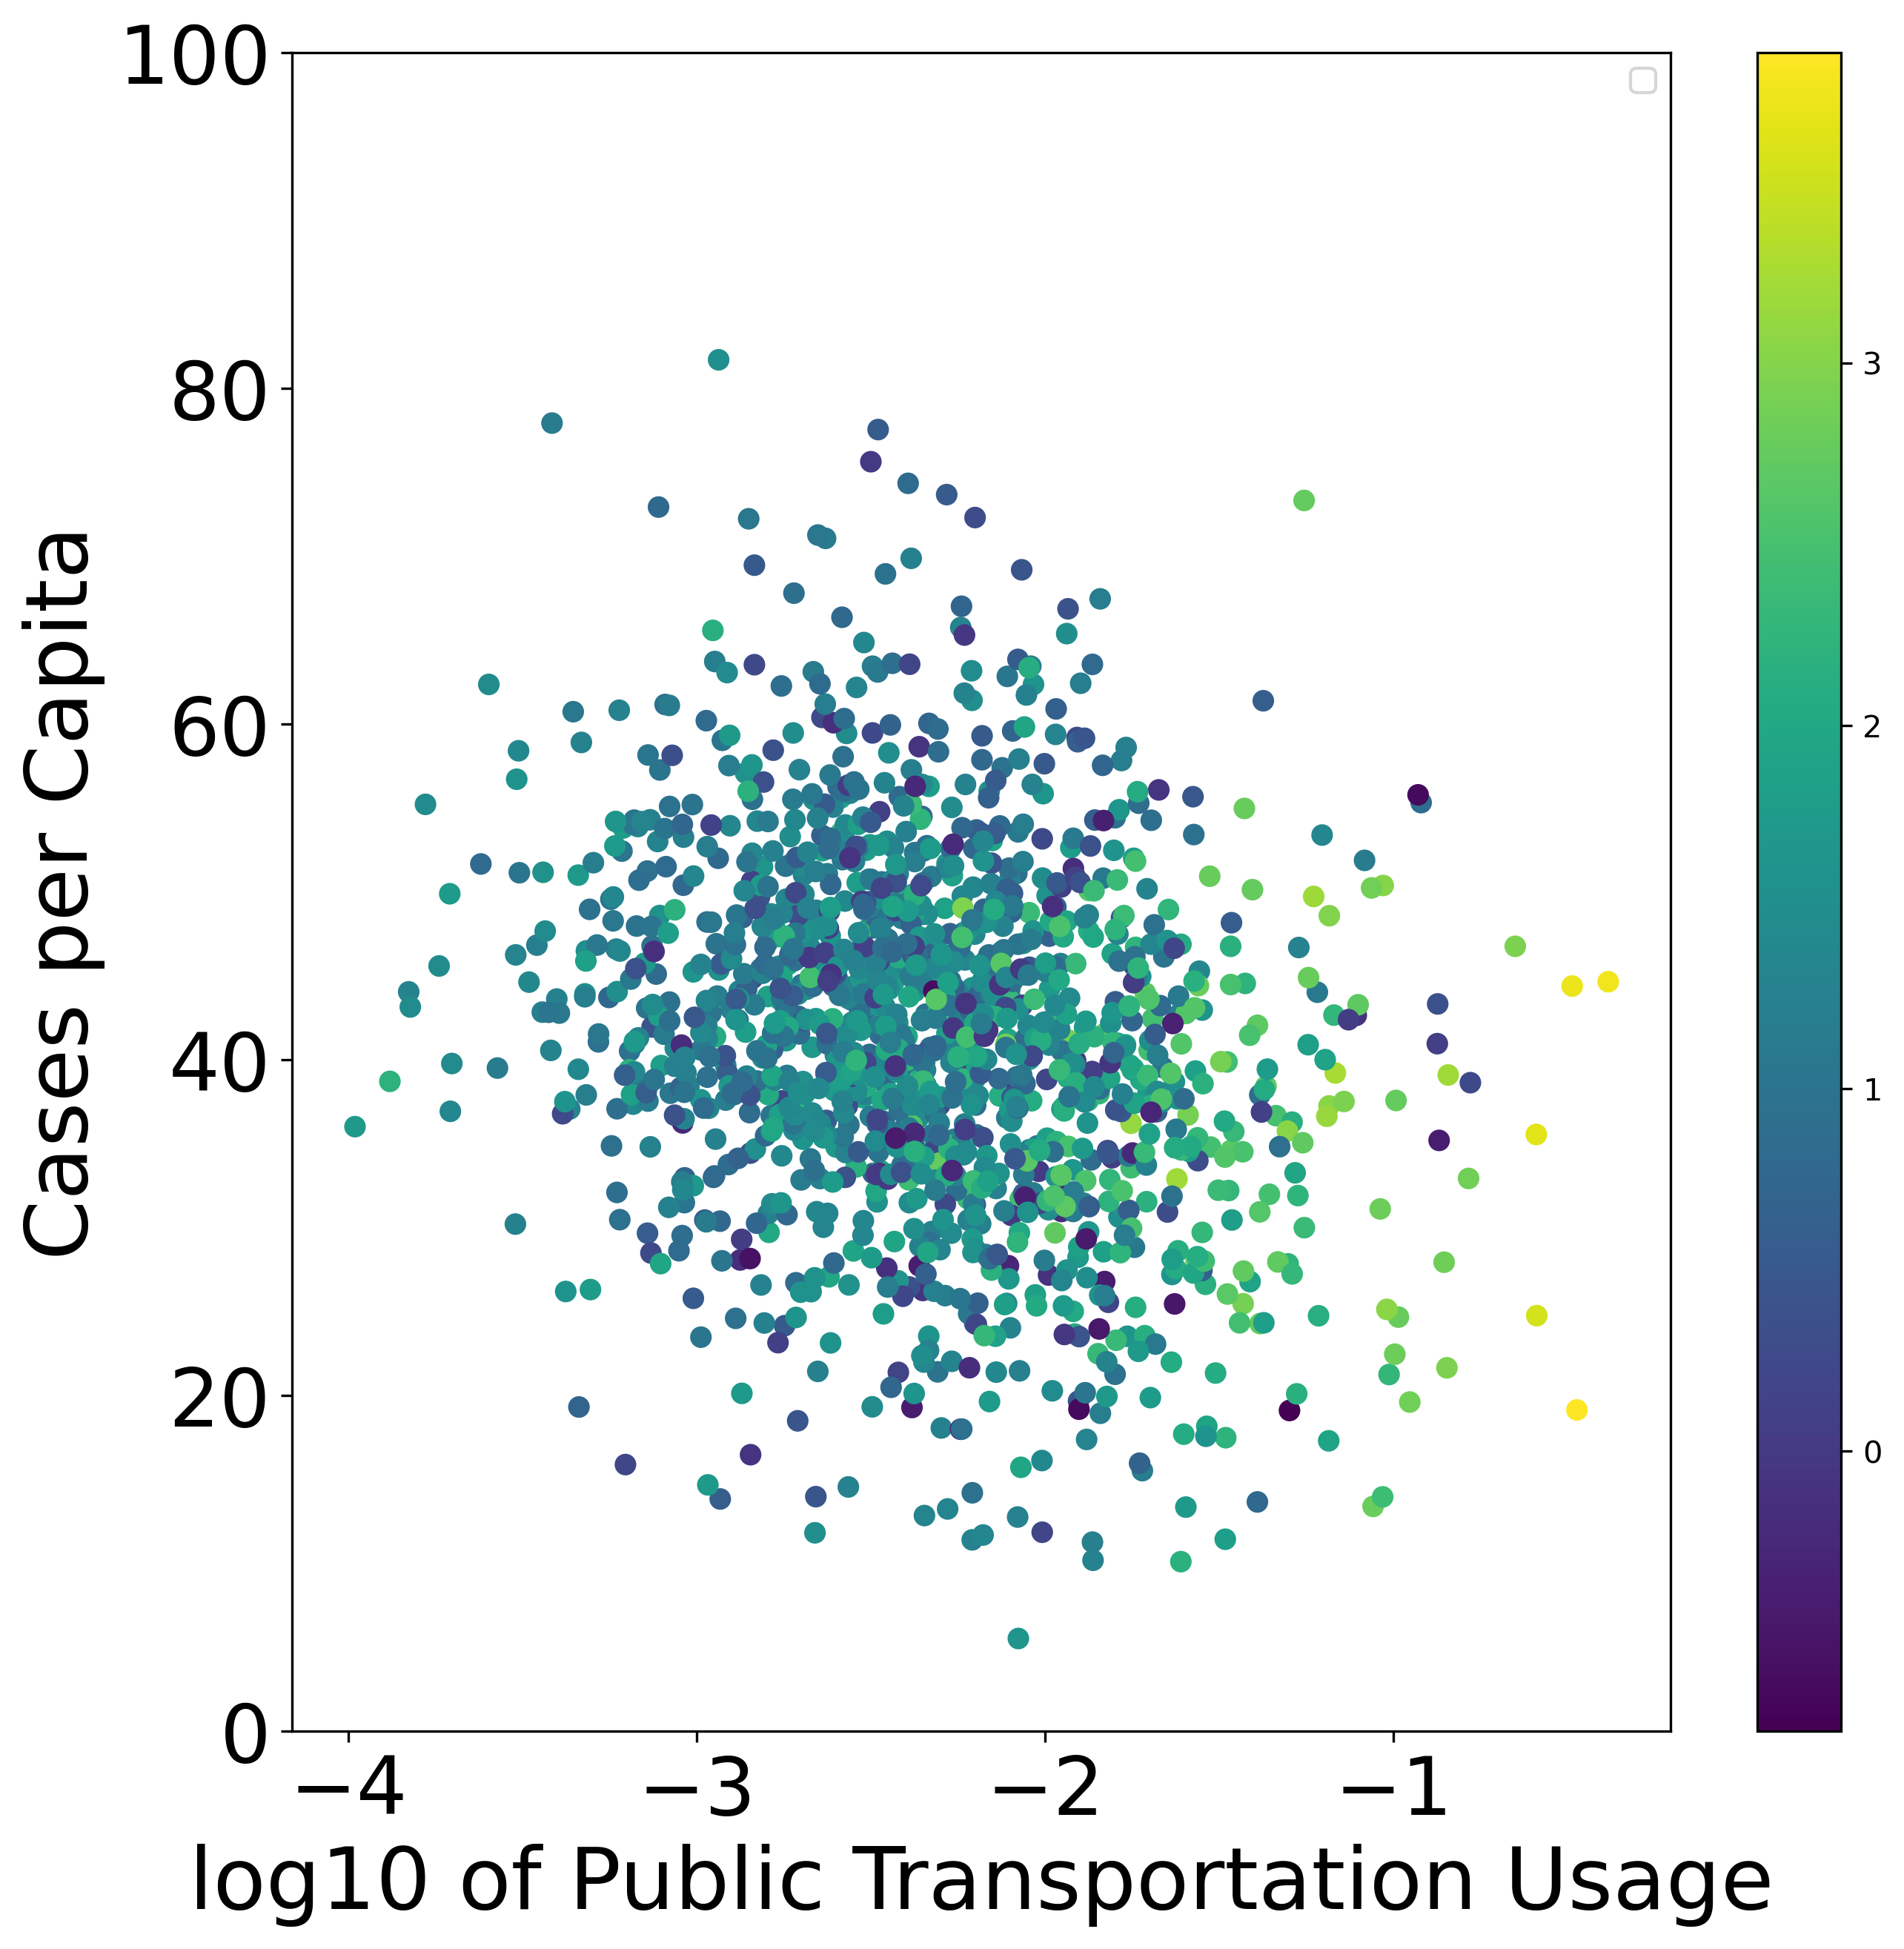

In [7]:
figure(figsize = (10, 10), dpi = 300)
ax = plt.scatter(x = data['logtrans'], y =data['infperpop'], c = data['logdensity'])
plt.legend('')
plt.tick_params(labelsize=26)
plt.xlabel('log10 of Public Transportation Usage', fontsize = 28)
plt.ylabel('Cases per Capita', fontsize = 28)
plt.ylim(0, 100)
plt.colorbar()
plt.show()

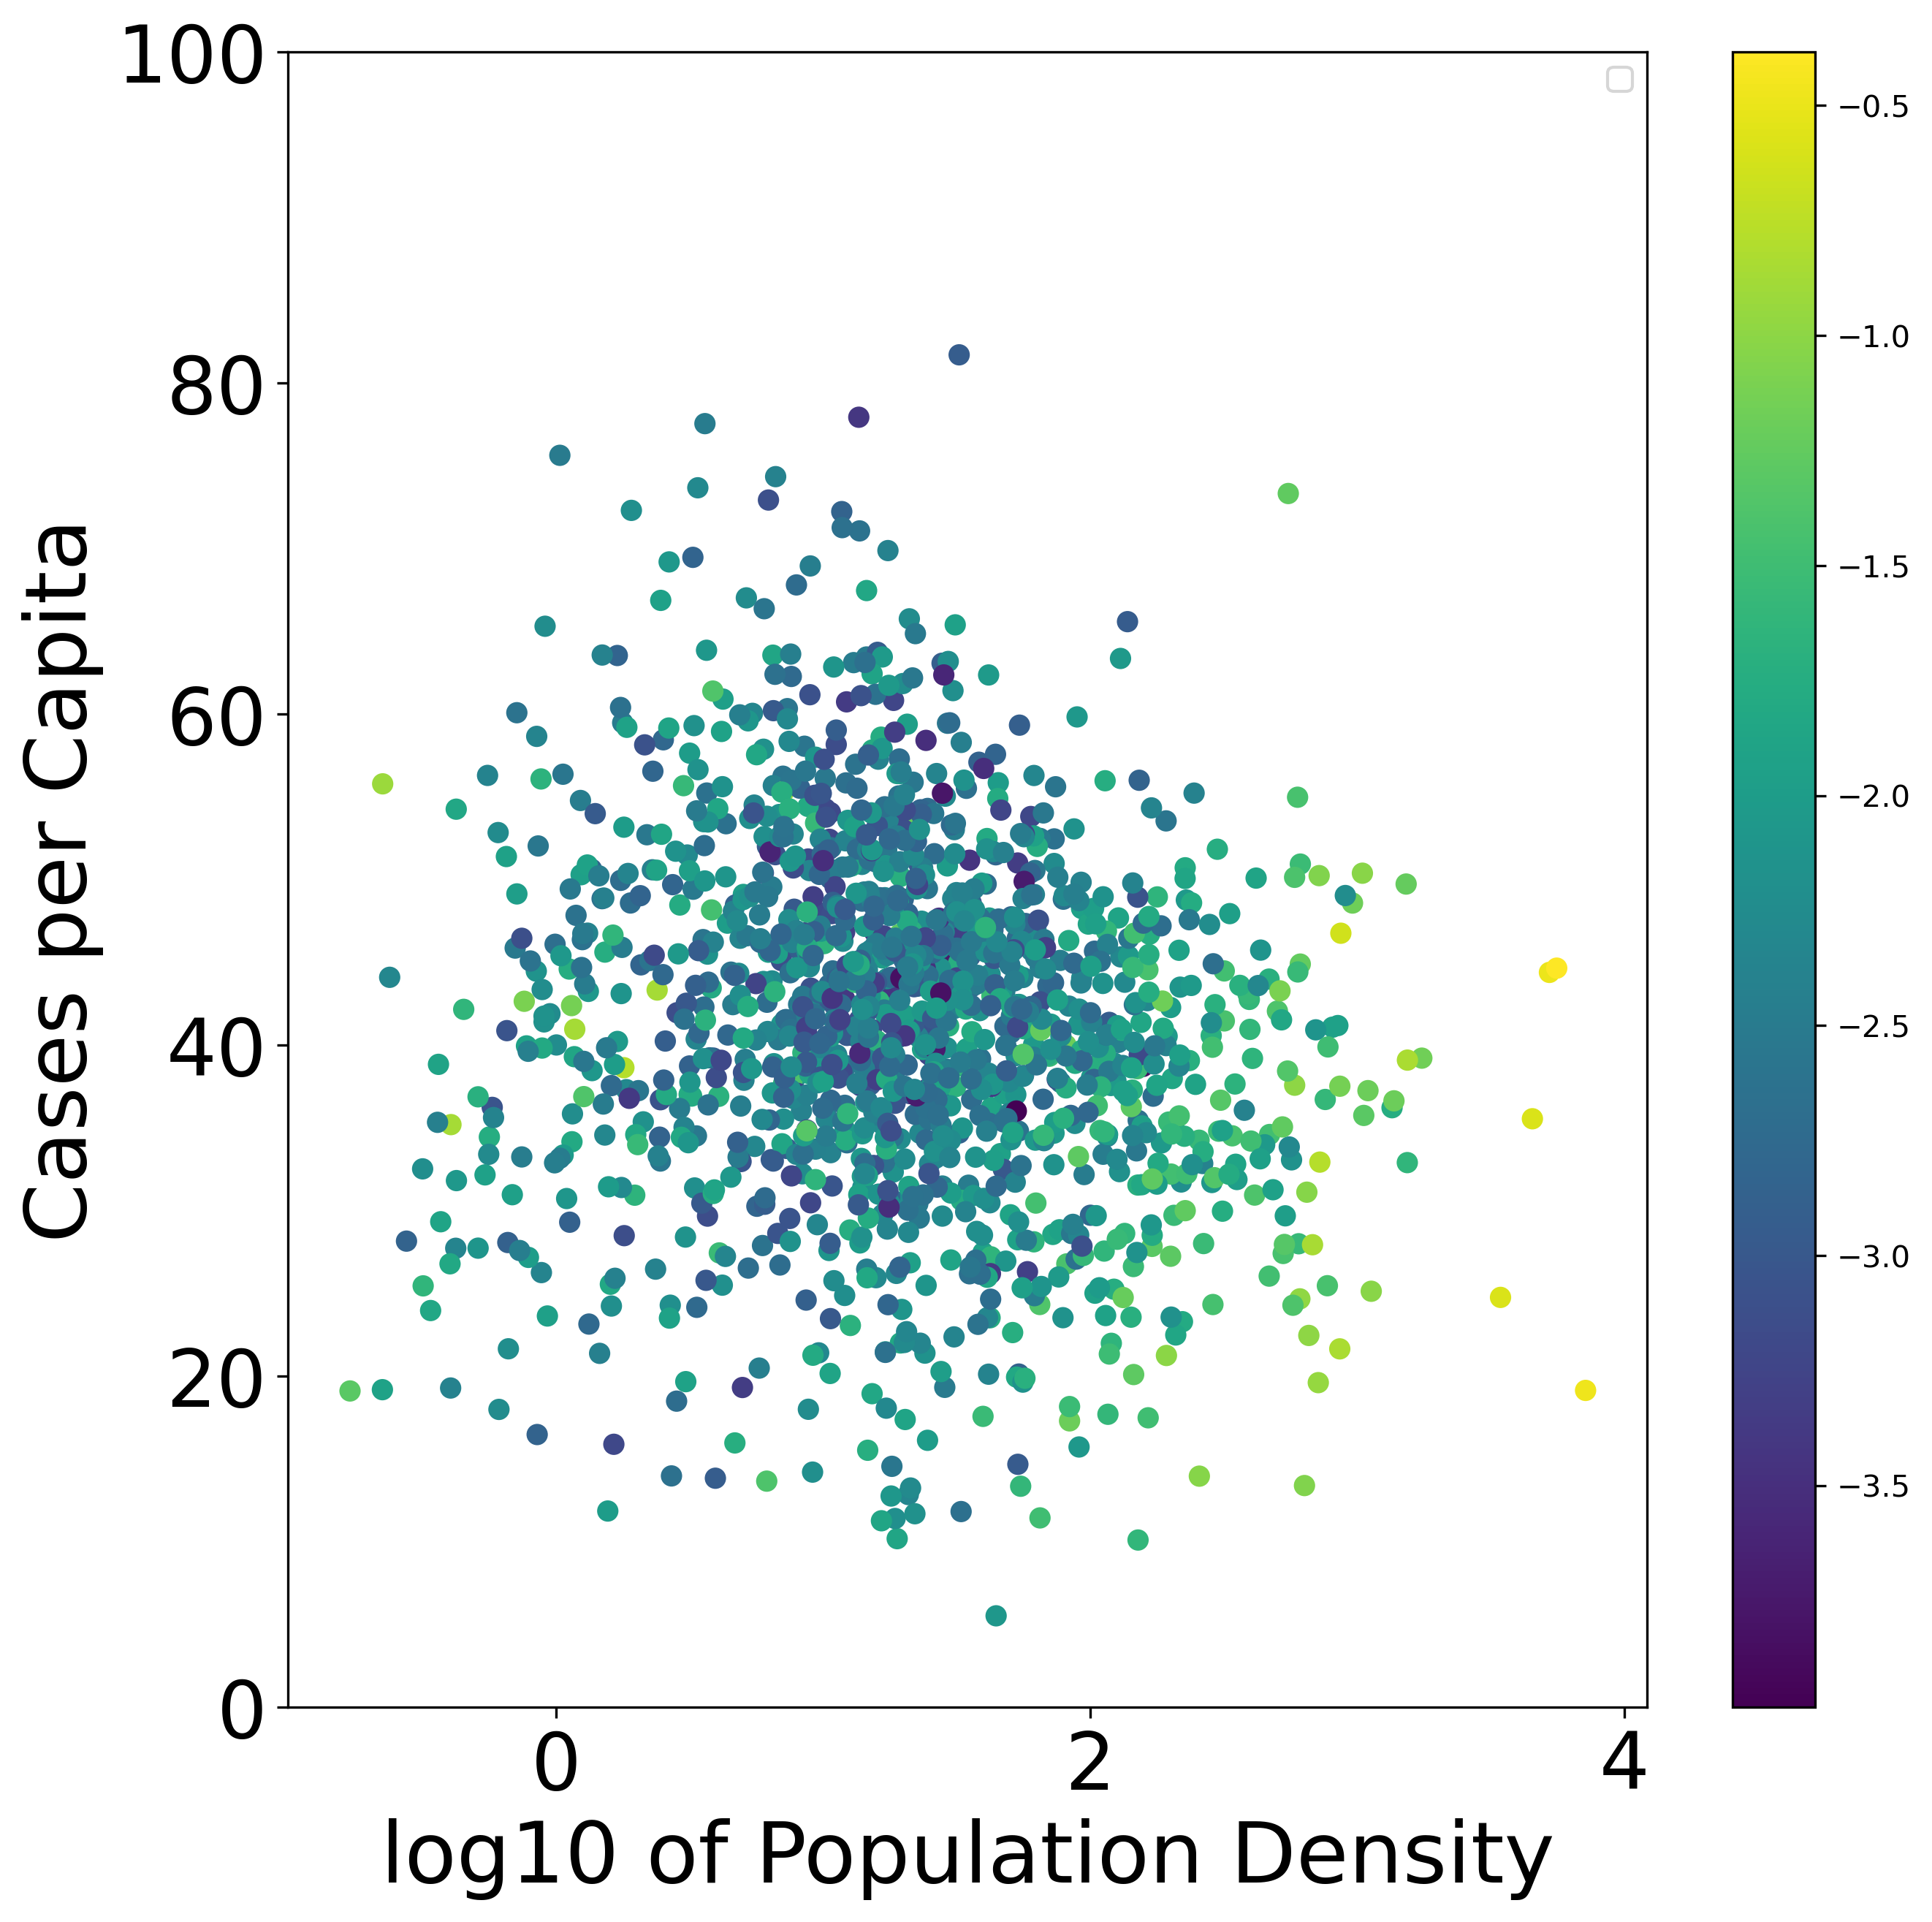

In [8]:
figure(figsize = (10, 10), dpi = 300)
ax = plt.scatter(x = data['logdensity'], y =data['infperpop'], c = data['logtrans'])
plt.legend('')
plt.tick_params(labelsize=26)
plt.xlabel('log10 of Population Density', fontsize = 28)
plt.ylabel('Cases per Capita', fontsize = 28)
plt.ylim(0, 100)
plt.colorbar()
plt.show()

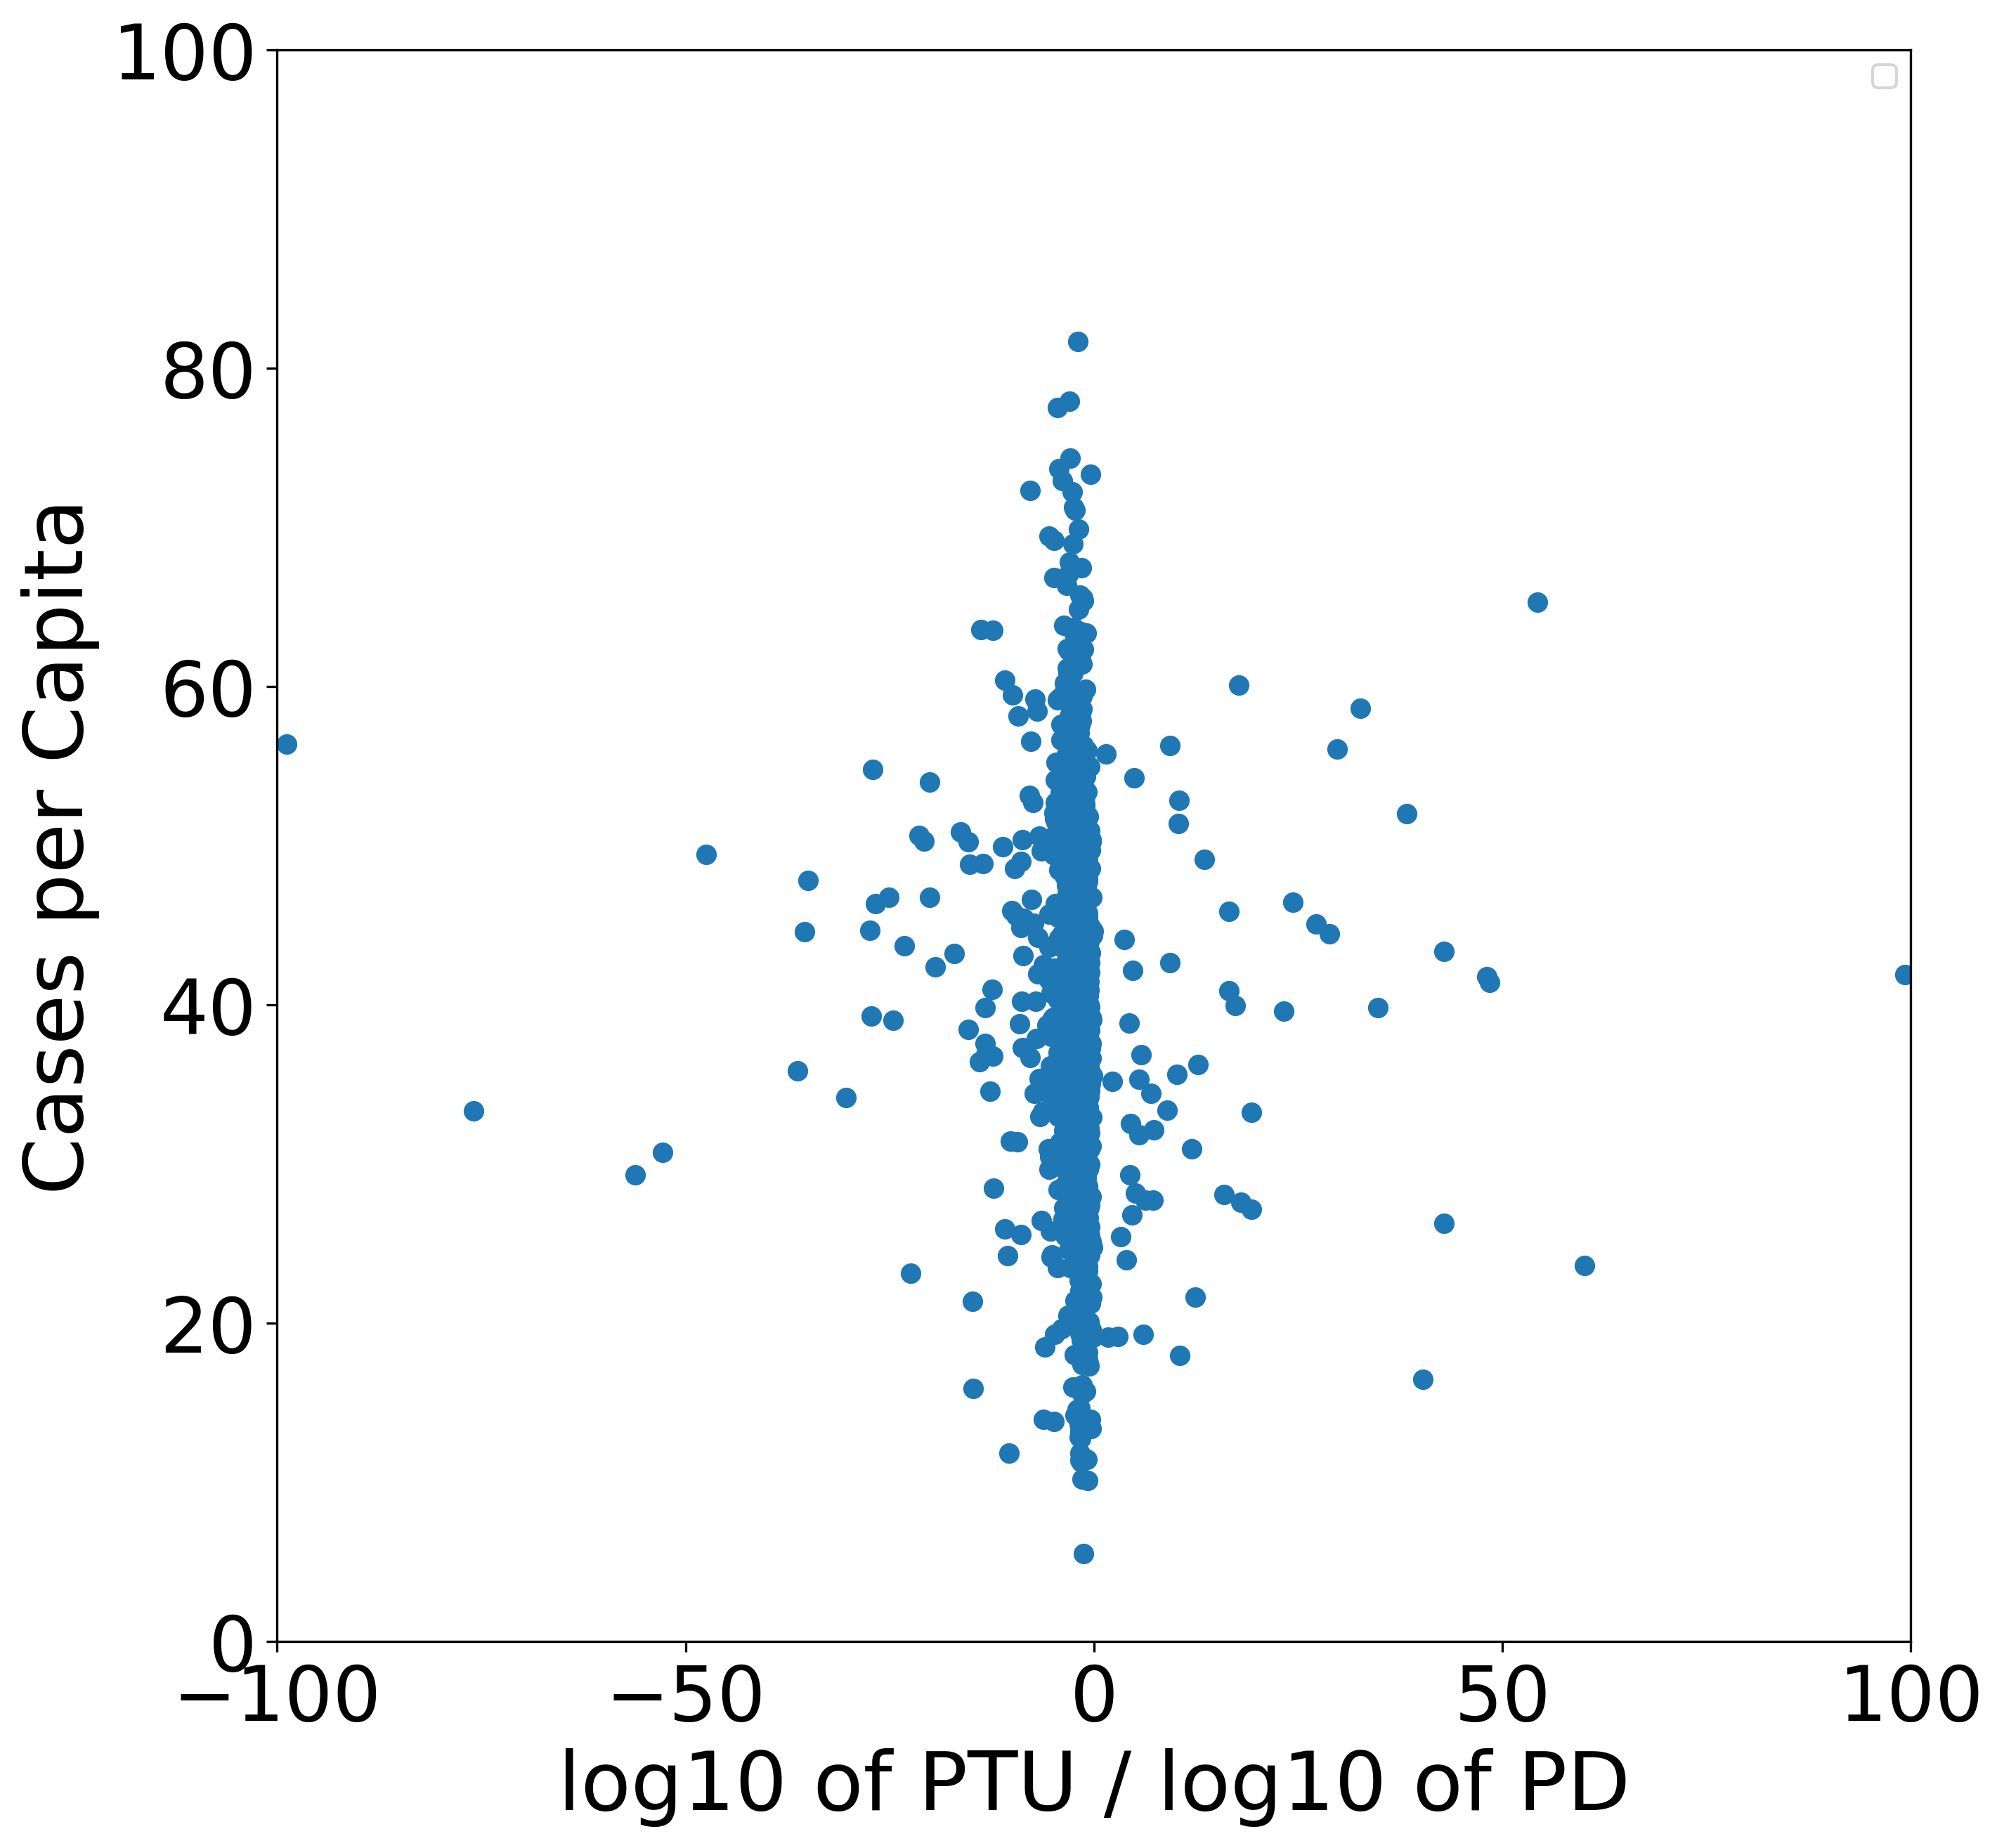

In [9]:
figure(figsize = (10, 10), dpi = 300)
translist = data['logtrans'].tolist()
densitylist = data['logdensity'].tolist()
ratiolist = np.divide(translist, densitylist)
ax = plt.scatter(x = ratiolist, y =data['infperpop'])
plt.legend('')
plt.tick_params(labelsize=26)
plt.xlabel('log10 of PTU / log10 of PD', fontsize = 28)
plt.ylabel('Cases per Capita', fontsize = 28)
plt.xlim(-100, 100)
plt.ylim(0, 100)
plt.show()

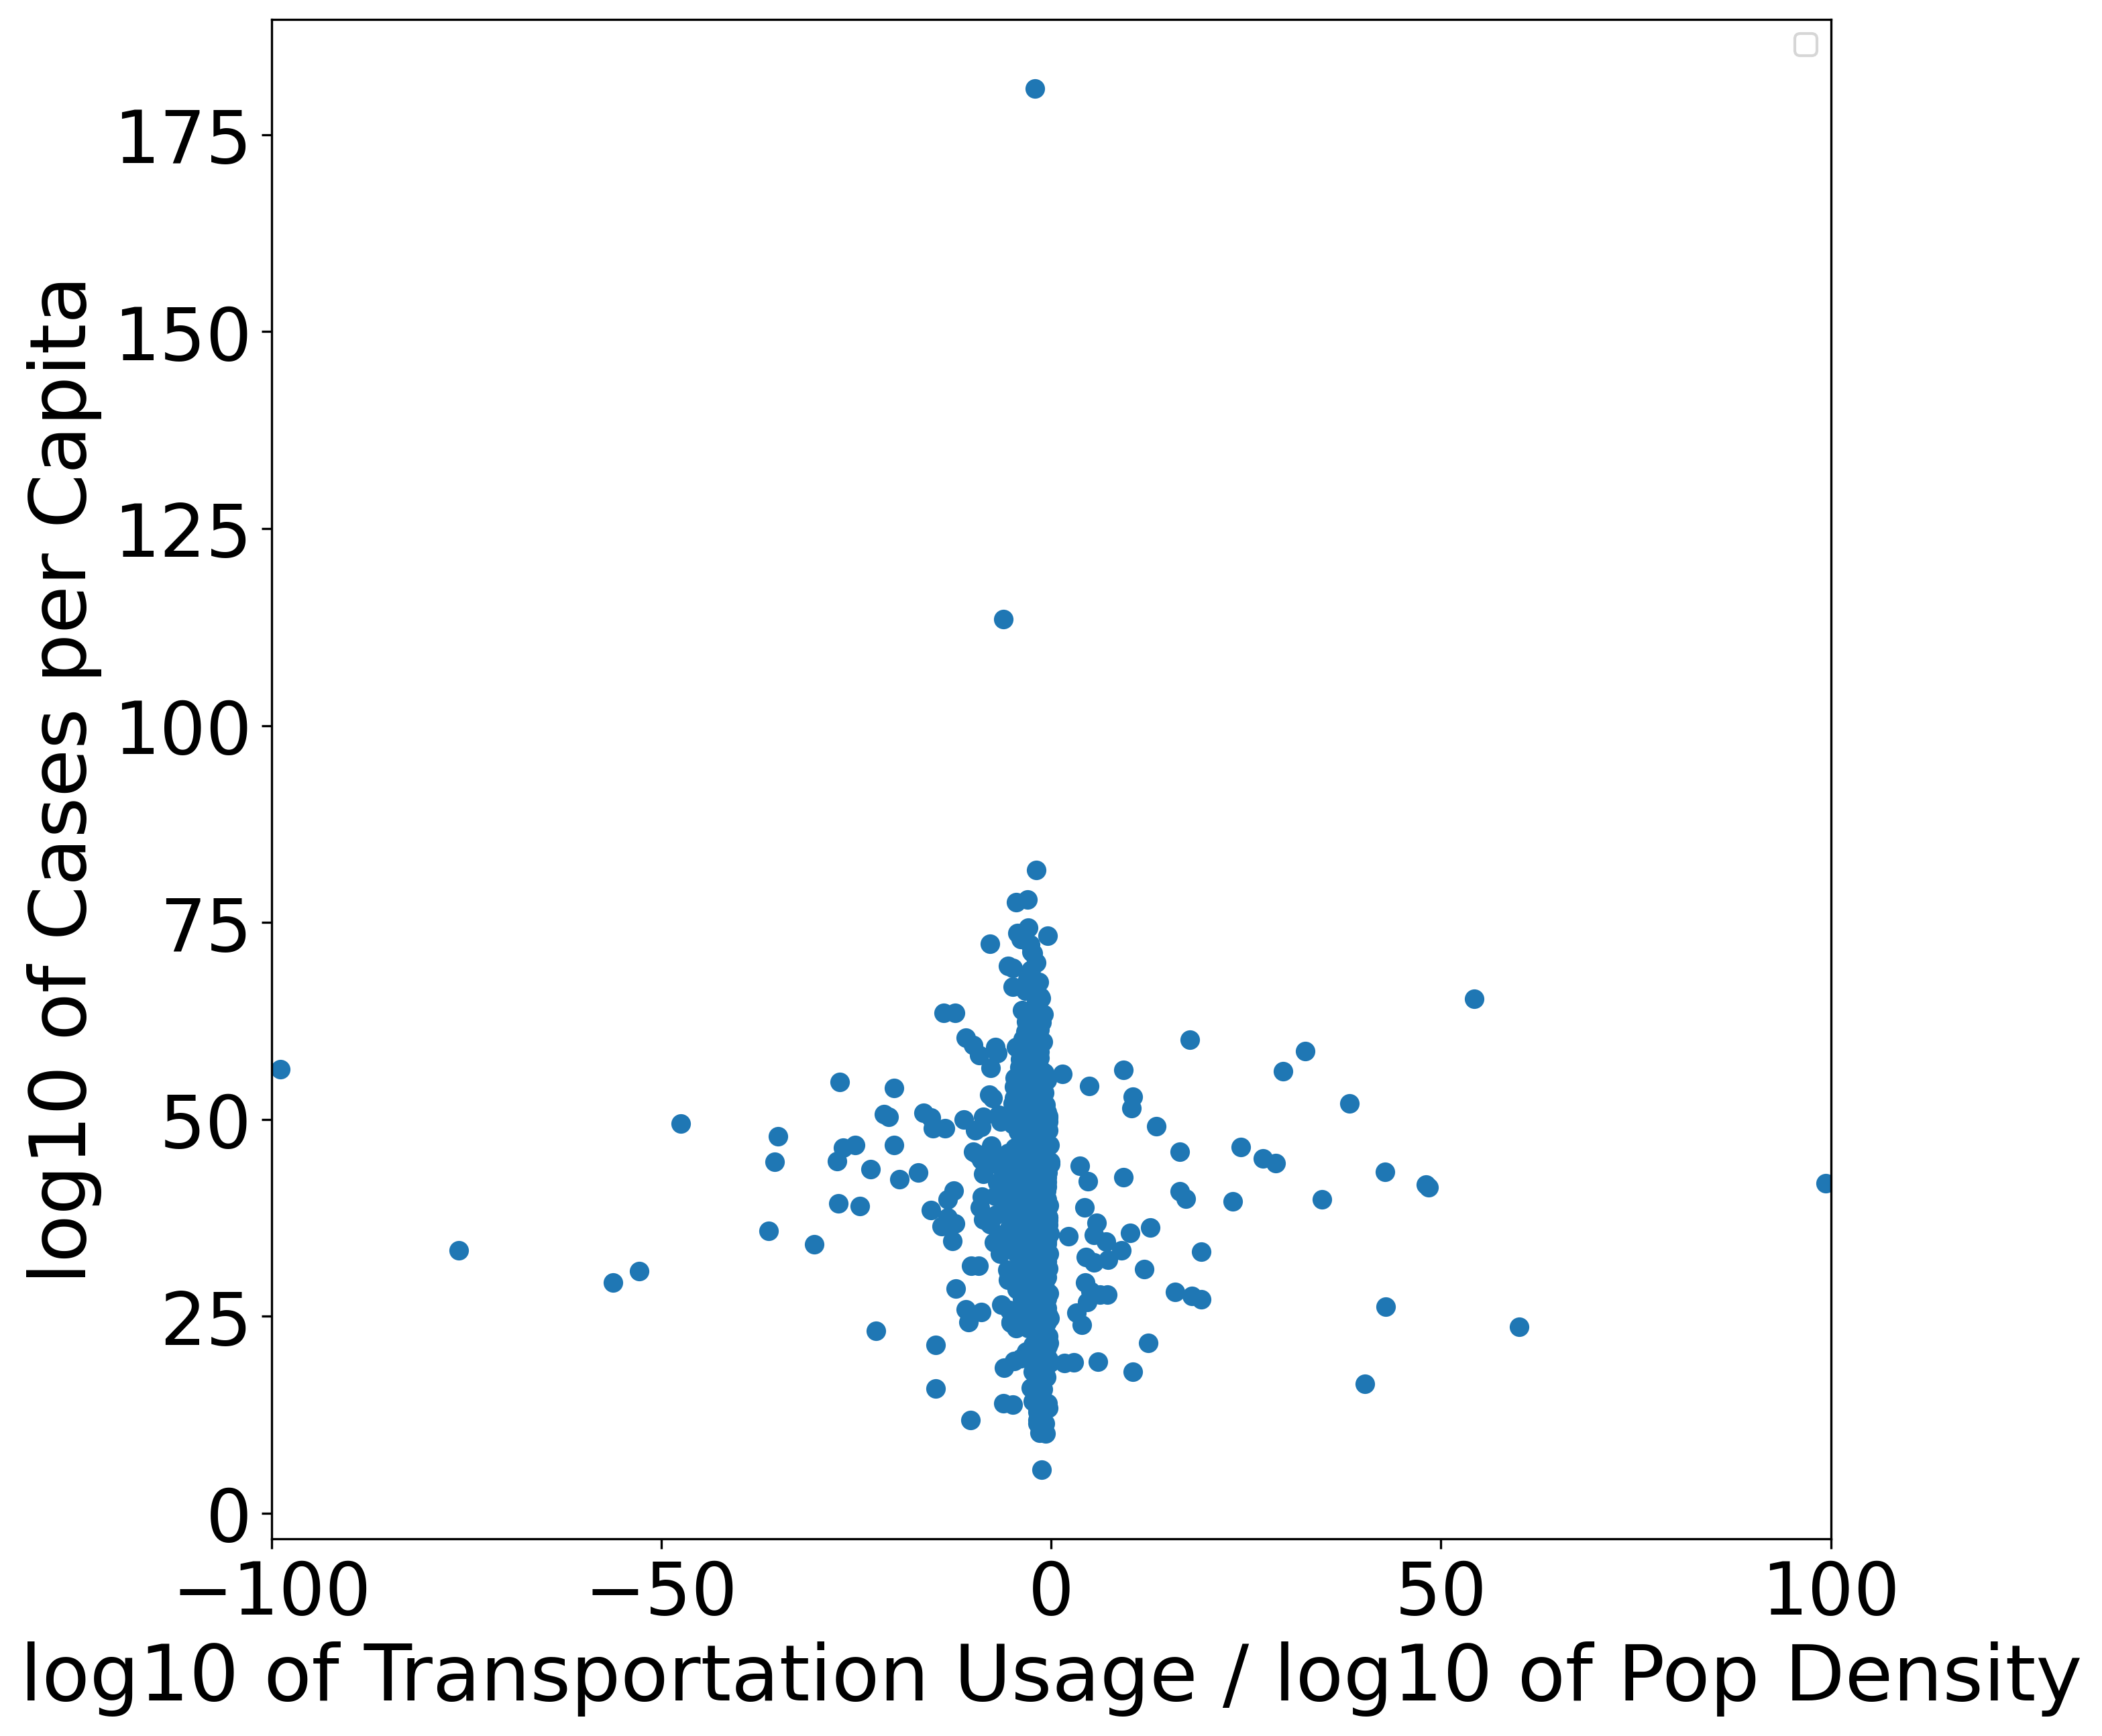

In [10]:
figure(figsize = (10, 10), dpi = 300)
translist = data['logtrans'].tolist()
densitylist = data['logdensity'].tolist()
ratiolist = np.divide(translist, densitylist)
ax = plt.scatter(x = ratiolist, y =data['infperpop'])
plt.legend('')
plt.tick_params(labelsize=26)
plt.xlabel('log10 of Transportation Usage / log10 of Pop Density', fontsize = 28)
plt.ylabel('log10 of Cases per Capita', fontsize = 28)
plt.xlim(-100, 100)
plt.show()

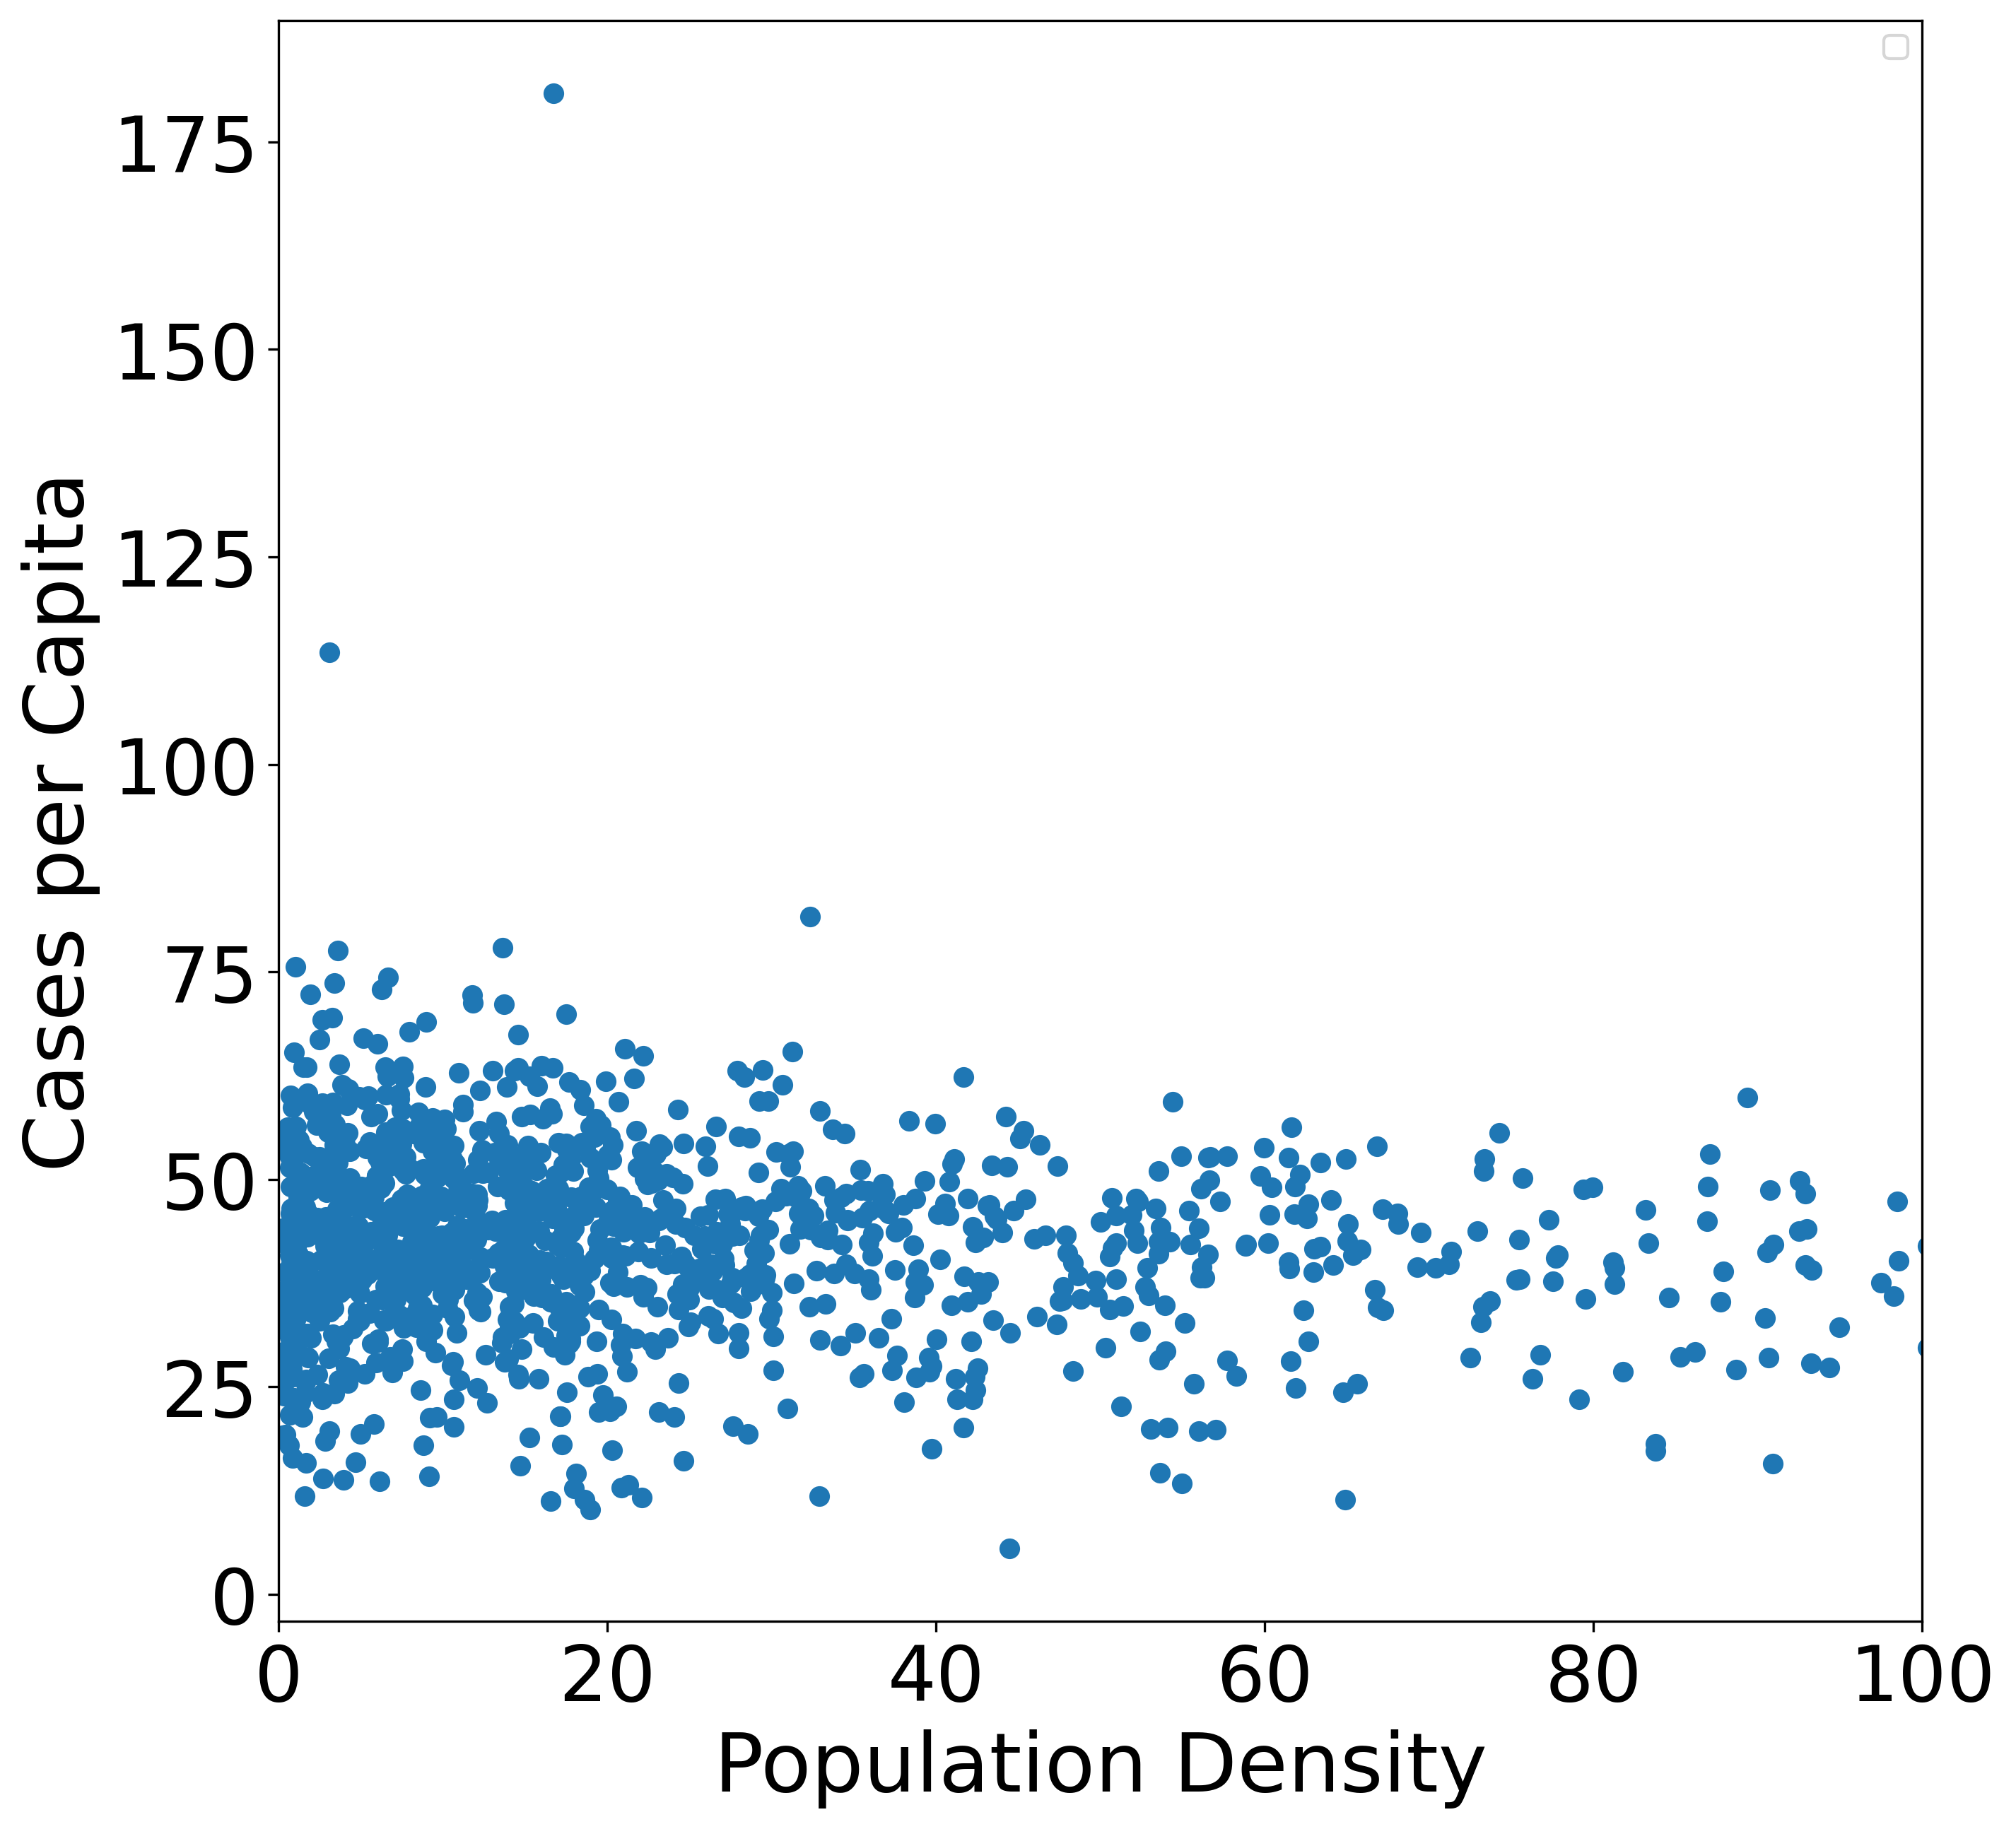

In [11]:
figure(figsize = (10, 10), dpi = 300)
densitylist = data['Density'].tolist()
ax = plt.scatter(x = densitylist, y =data['infperpop'])
plt.legend('')
plt.tick_params(labelsize=26)
plt.xlabel('Population Density', fontsize = 28)
plt.ylabel('Cases per Capita', fontsize = 28)
plt.xlim(0, 100)
plt.show()

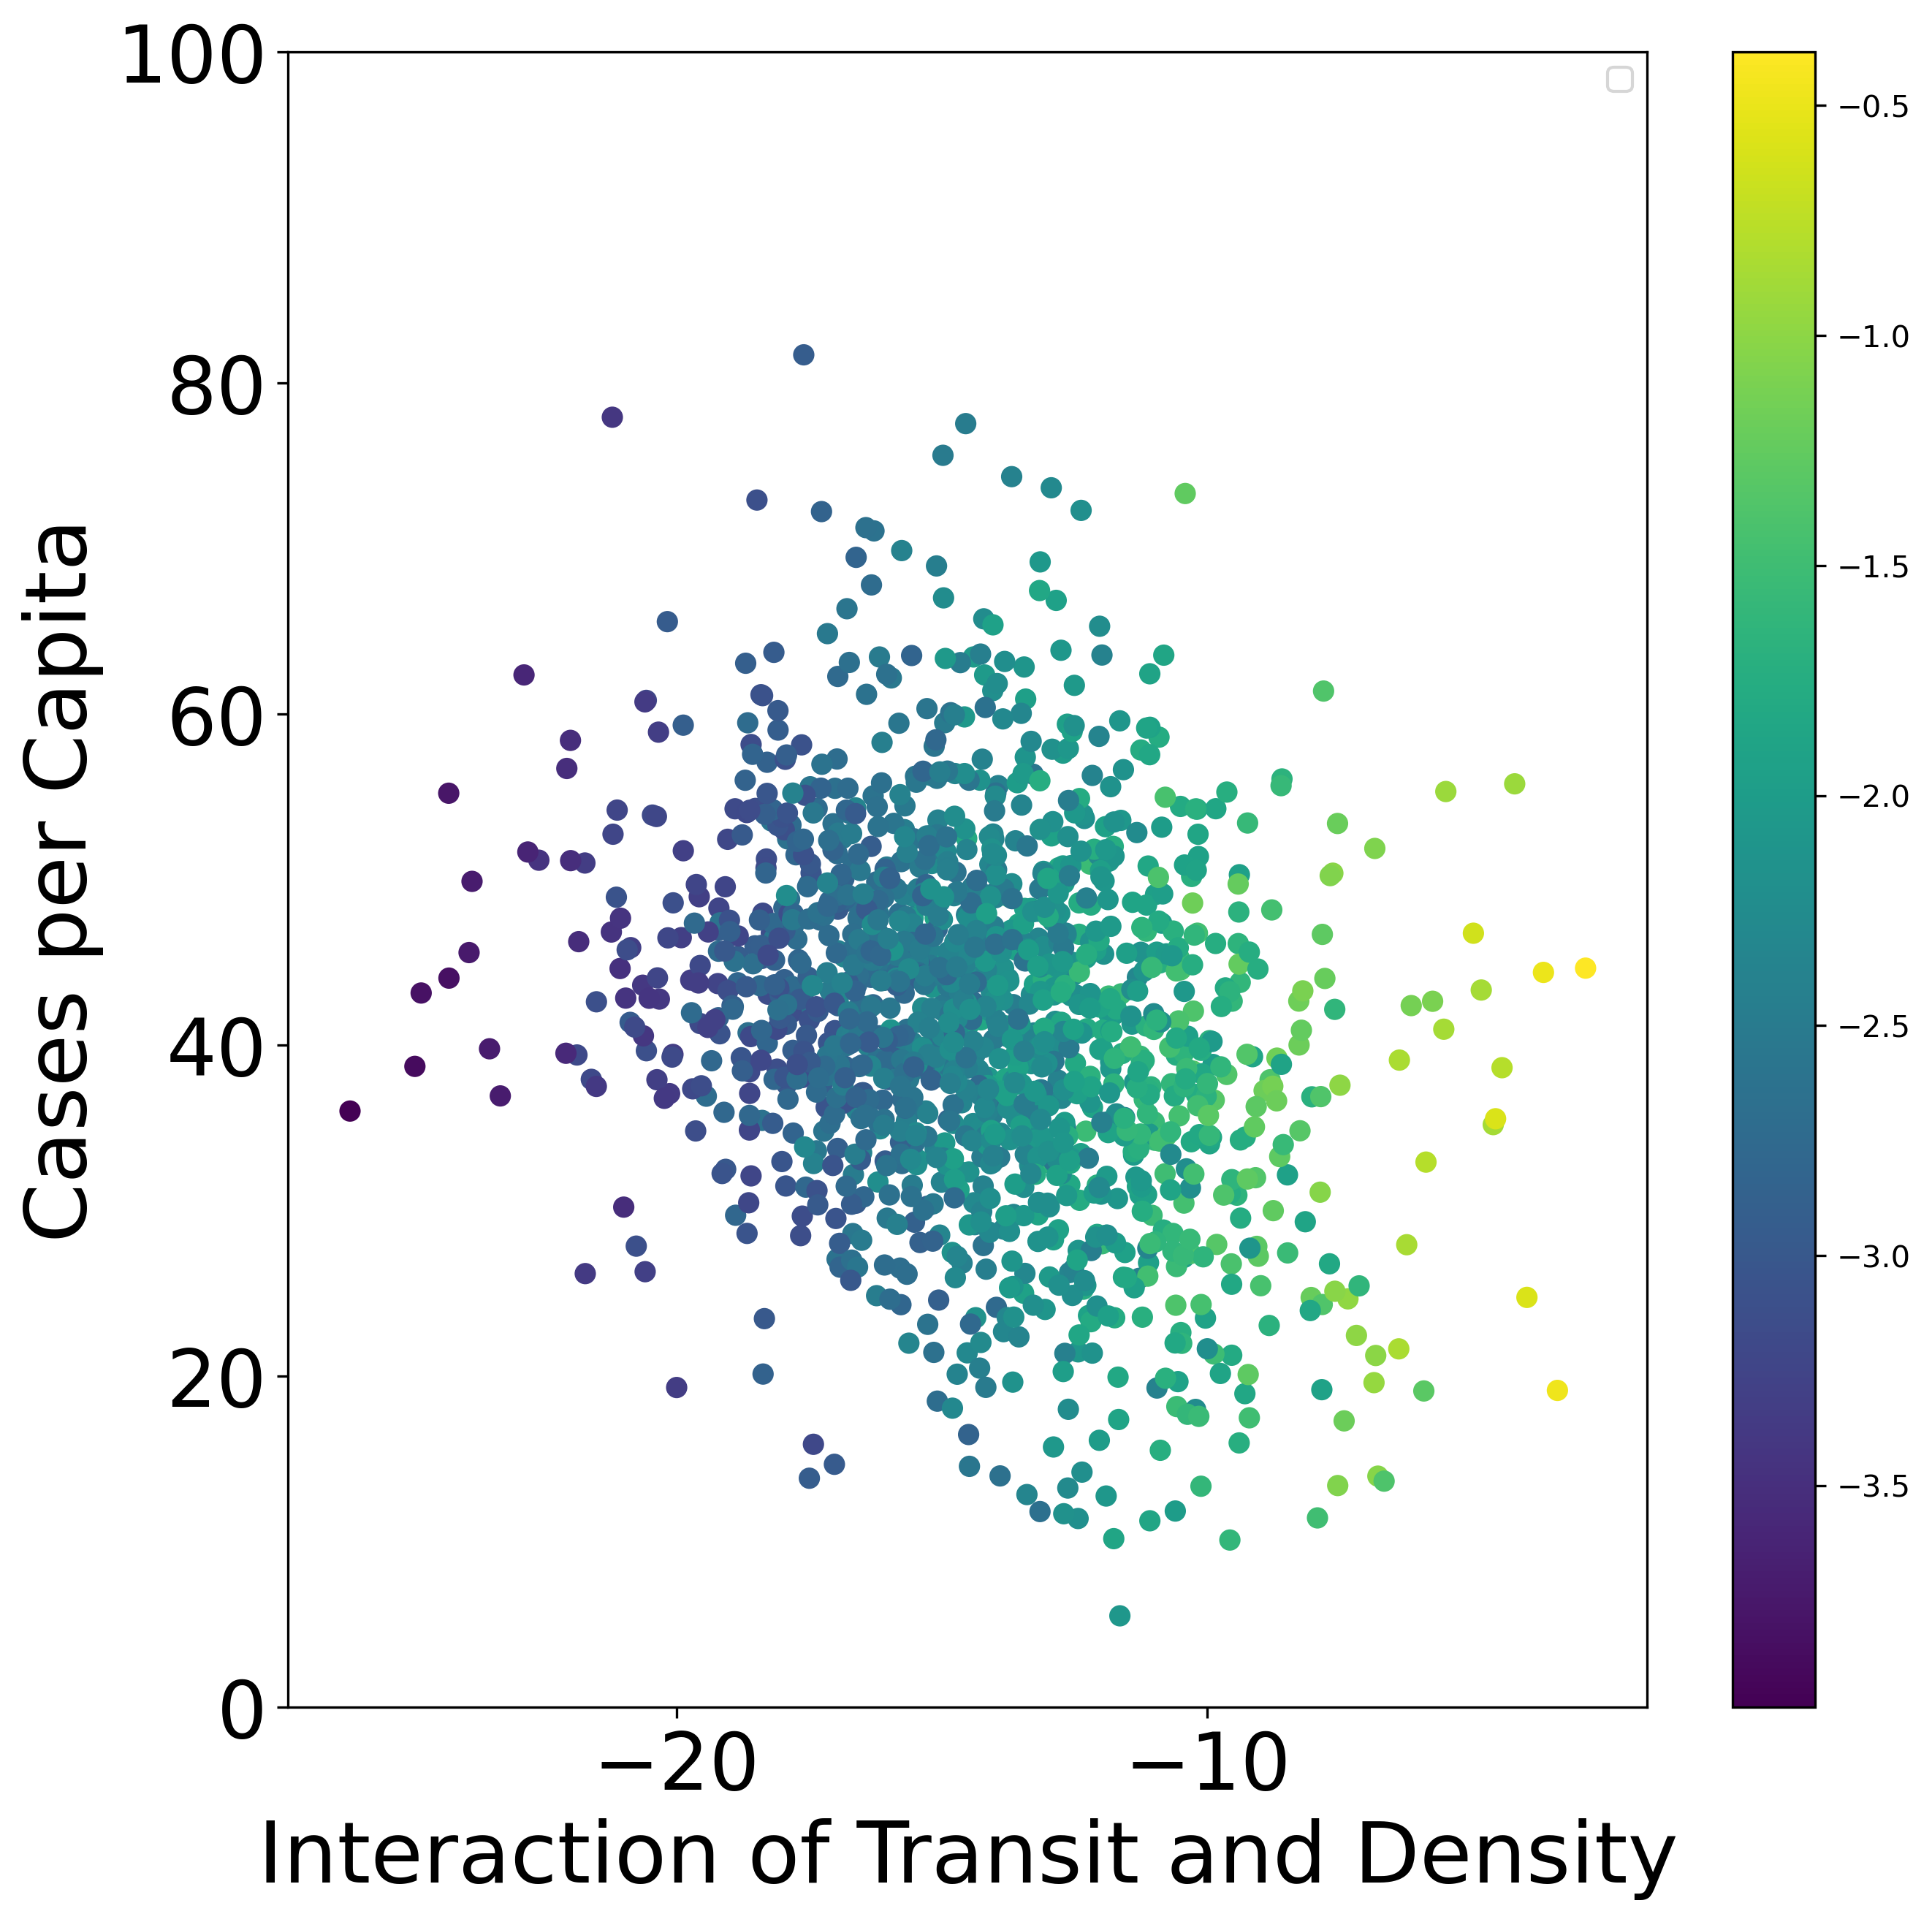

In [12]:
figure(figsize = (10, 10), dpi = 300)
ax = plt.scatter(x = data['logd*tinteraction'], y =data['infperpop'], c = data['logtrans'])
plt.legend('')
plt.tick_params(labelsize=26)
plt.xlabel('Interaction of Transit and Density', fontsize = 28)
plt.ylabel('Cases per Capita', fontsize = 28)
plt.ylim(0, 100)
plt.colorbar()
plt.show()

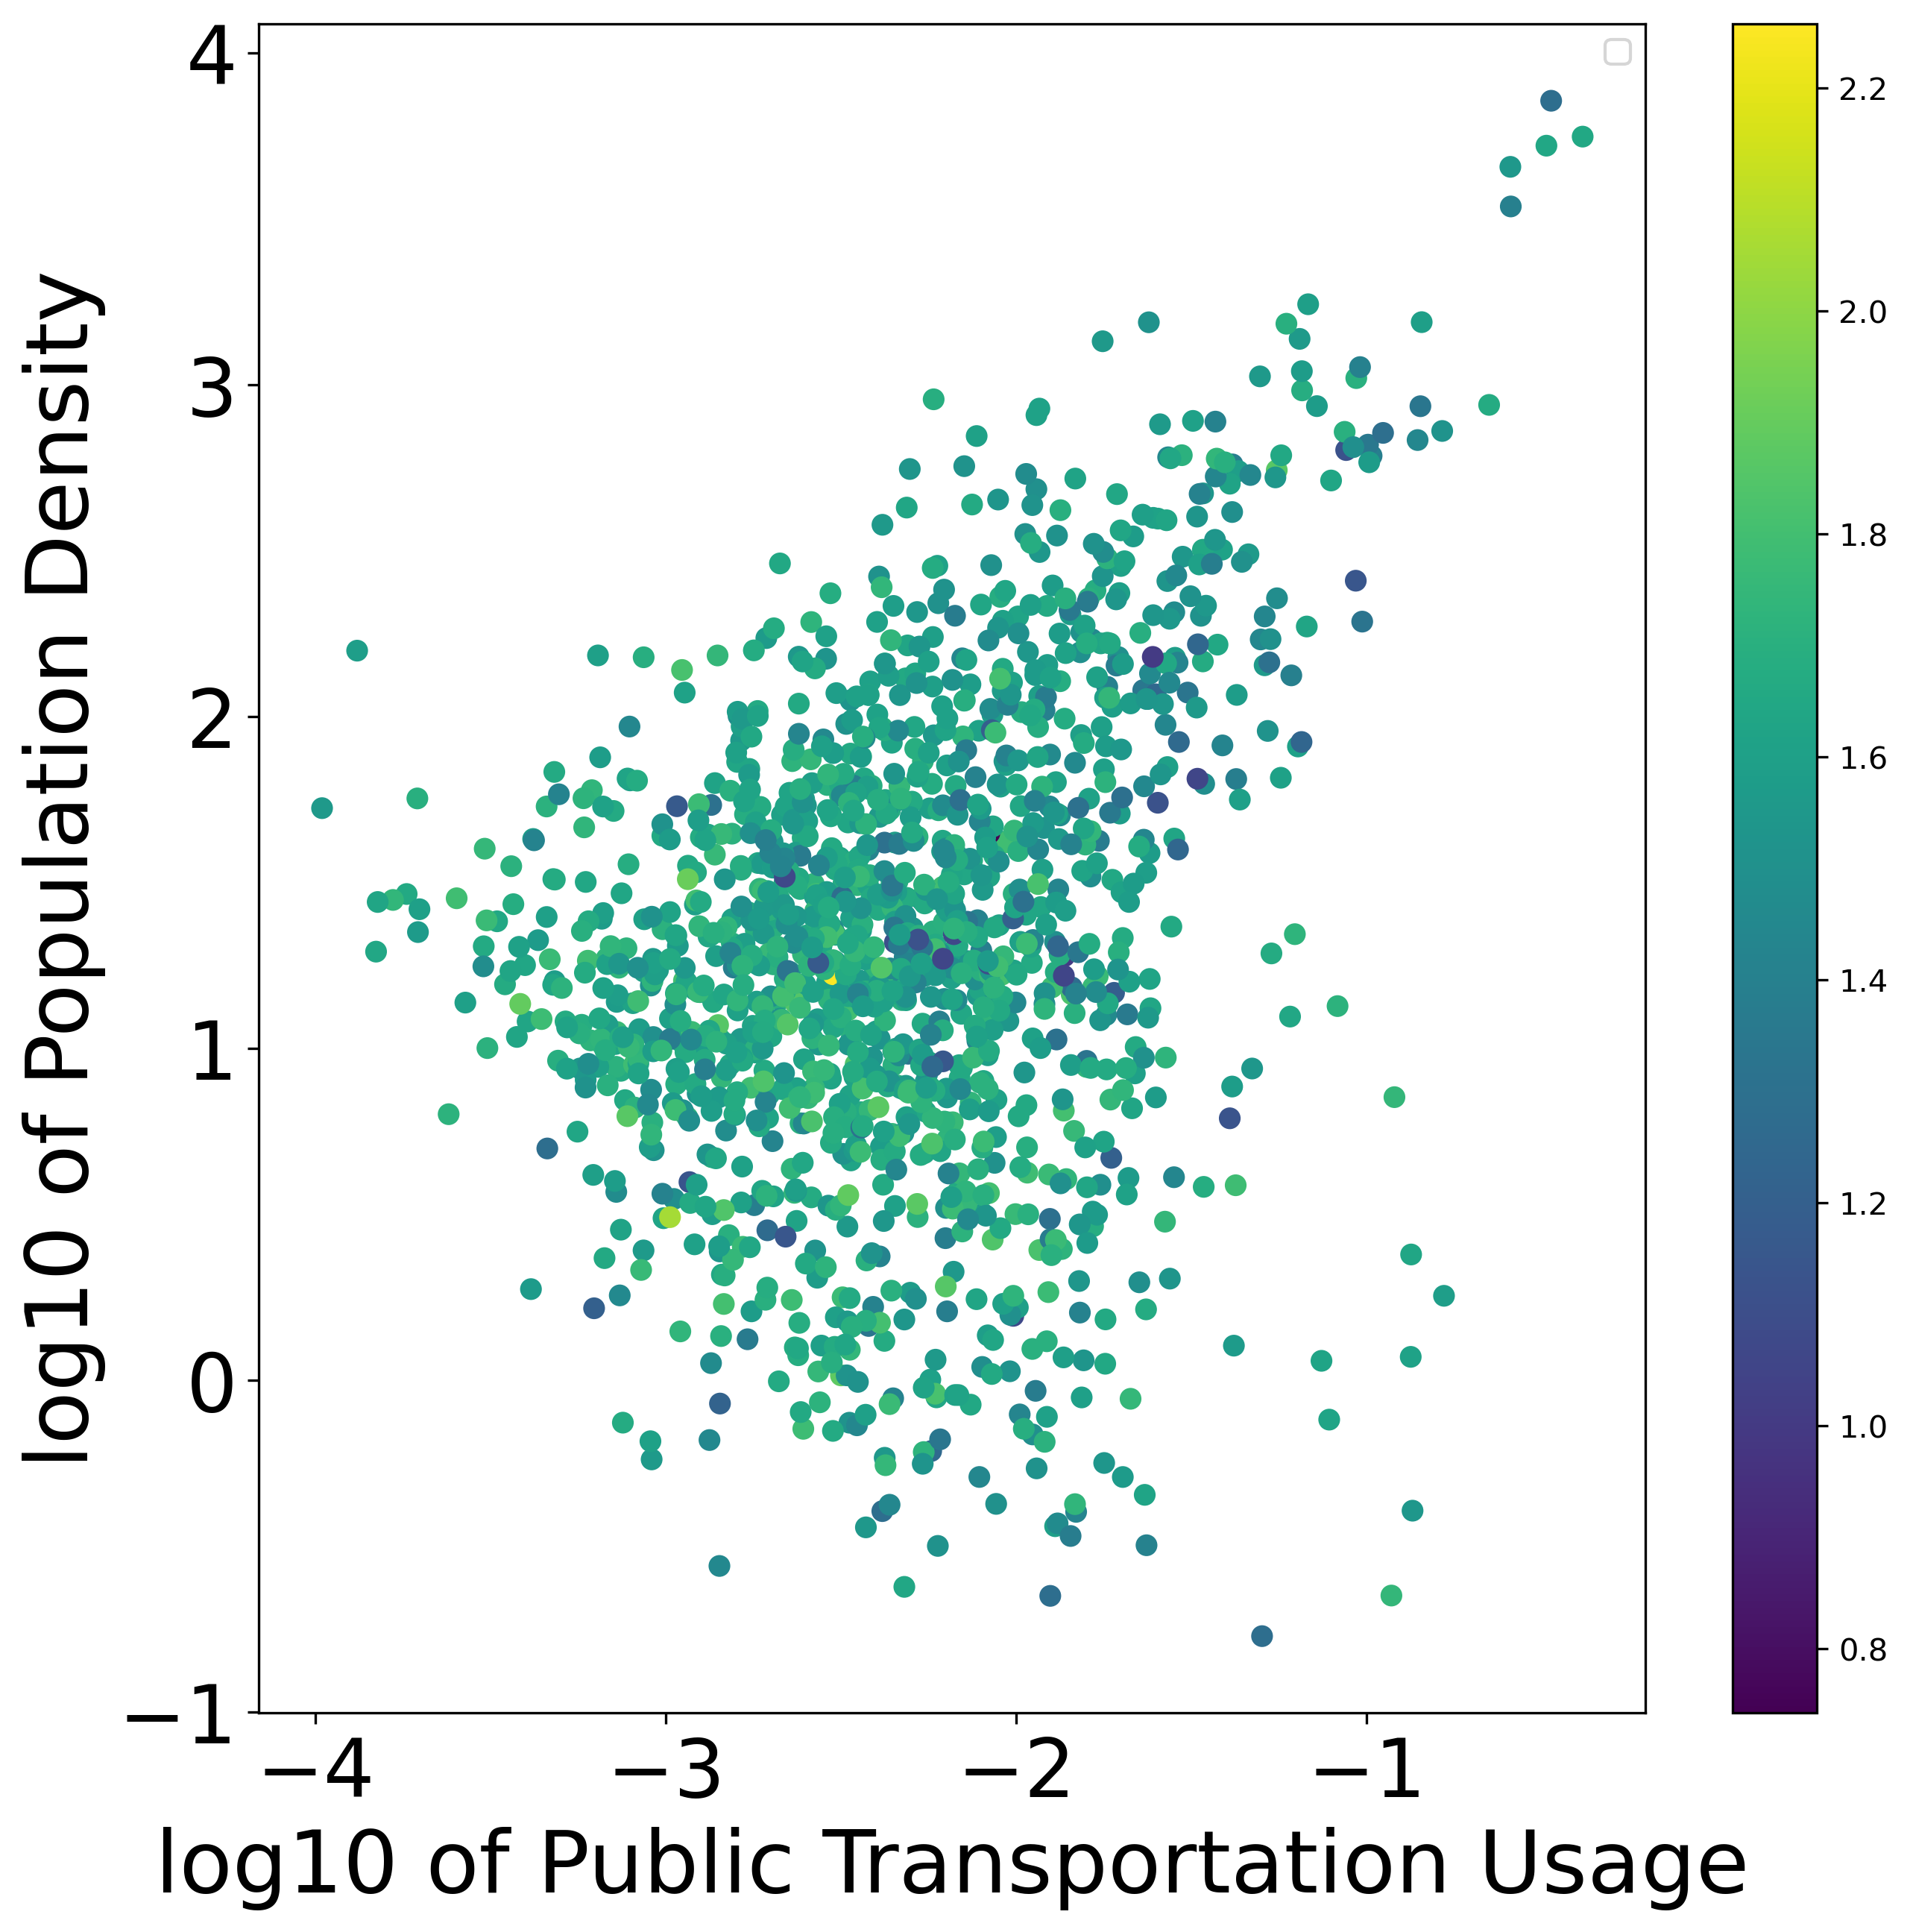

In [13]:
figure(figsize = (10, 10), dpi = 300)
ax = plt.scatter(x = data['logtrans'], y =data['logdensity'], c = data['loginfperpop'])
plt.legend('')
plt.tick_params(labelsize=26)
plt.xlabel('log10 of Public Transportation Usage', fontsize = 28)
plt.ylabel('log10 of Population Density', fontsize = 28)
plt.colorbar()
plt.show()